# Enhanced Report Display - Individual Models vs Ensemble

This notebook displays comprehensive results comparing individual feature-based models with ensemble performance.

In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import glob
from scipy.stats import ttest_rel
from modules.PostgresDBHandler import PostgresDBHandler

# Feature types used in your project
FEATURE_TYPES = [
    'mel_spectrogram', 'mfcc', 'chromagram', 'spectral_contrast',
    'tonnetz', 'constant_q', 'cqt', 'stft', 'harmonic_percussive', 'onset_strength'
]

dbParams = {
    "dbname": "mydatabase",
    "user": "myuser",
    "password": "mypassword",
    "host": "postgres_server",
    "port": "5432",
}

In [2]:
db = PostgresDBHandler(**dbParams)
db.connect()
instrument_df = db.get_mappings_instruments()
db.close()

class_names = [name for _, name in sorted(zip(instrument_df['instrumentid'], instrument_df['name']))]
print("Class names:", class_names)

Class names: ['sax', 'trumpet', 'violin', 'clarinet', 'cello', 'piccolo', 'flute', 'bass', 'oboe']


In [3]:
# Find and load the latest ensemble results
ensemble_results_files = sorted(glob.glob("ensemble_results/ensemble_results_*.json"), reverse=True)
if not ensemble_results_files:
    raise FileNotFoundError("No ensemble results file found in ensemble_results/ directory.")
ENSEMBLE_RESULTS_PATH = ensemble_results_files[0]

with open(ENSEMBLE_RESULTS_PATH, "r") as file:
    ensemble_results = json.load(file)

print(f"Loaded ensemble results from: {ENSEMBLE_RESULTS_PATH}")

Loaded ensemble results from: ensemble_results/ensemble_results_2025_07_08.json


In [4]:
# Load individual model results for all feature types
individual_results = {}
for feature_type in FEATURE_TYPES:
    results_path = f"models/{feature_type}/results.json"
    if os.path.exists(results_path):
        with open(results_path, "r") as f:
            individual_results[feature_type] = json.load(f)
    else:
        print(f"Results not found for {feature_type}")

In [5]:
# Display ensemble accuracy statistics
accs = ensemble_results['accuracy_list']
print("Ensemble Accuracies (per fold):", accs)
print(f"Mean Ensemble Accuracy: {np.mean(accs):.4f}")
print(f"Std Ensemble Accuracy: {np.std(accs):.4f}")
print(f"Min Ensemble Accuracy: {np.min(accs):.4f}")
print(f"Max Ensemble Accuracy: {np.max(accs):.4f}")

Ensemble Accuracies (per fold): [0.7407407407407407, 0.7962962962962963, 0.8148148148148148, 0.8703703703703703, 0.7777777777777778]
Mean Ensemble Accuracy: 0.8000
Std Ensemble Accuracy: 0.0429
Min Ensemble Accuracy: 0.7407
Max Ensemble Accuracy: 0.8704


In [6]:
# Display ensemble classification reports for each fold
for i, report in enumerate(ensemble_results['classification_reports']):
    df = pd.DataFrame(report).transpose()
    df.index = [class_names[int(idx)] if idx.isdigit() and int(idx) < len(class_names) else idx for idx in df.index]
    display(df)

precision    recall  f1-score    support
sax            0.500000  0.857143  0.631579   7.000000
trumpet        1.000000  0.333333  0.500000   6.000000
violin         1.000000  1.000000  1.000000   6.000000
clarinet       1.000000  0.428571  0.600000   7.000000
cello          0.857143  1.000000  0.923077   6.000000
piccolo        0.666667  1.000000  0.800000   6.000000
flute          0.666667  0.571429  0.615385   7.000000
bass           1.000000  1.000000  1.000000   5.000000
oboe           0.500000  0.500000  0.500000   4.000000
accuracy       0.740741  0.740741  0.740741   0.740741
macro avg      0.798942  0.743386  0.730004  54.000000
weighted avg   0.802028  0.740741  0.727170  54.000000

precision    recall  f1-score    support
sax            0.500000  0.800000  0.615385   5.000000
trumpet        0.777778  1.000000  0.875000   7.000000
violin         0.857143  1.000000  0.923077   6.000000
clarinet       0.800000  0.500000  0.615385   8.000000
cello          0.875000  0.875000  0.875000   8.000000
piccolo        0.750000  1.000000  0.857143   3.000000
flute          0.800000  0.500000  0.615385   8.000000
bass           1.000000  1.000000  1.000000   5.000000
oboe           1.000000  0.750000  0.857143   4.000000
accuracy       0.796296  0.796296  0.796296   0.796296
macro avg      0.817769  0.825000  0.803724  54.000000
weighted avg   0.817357  0.796296  0.788640  54.000000

precision    recall  f1-score    support
sax            0.750000  0.750000  0.750000   4.000000
trumpet        0.666667  1.000000  0.800000   4.000000
violin         0.833333  1.000000  0.909091   5.000000
clarinet       0.666667  0.333333  0.444444   6.000000
cello          0.714286  0.833333  0.769231   6.000000
piccolo        1.000000  1.000000  1.000000   8.000000
flute          1.000000  0.833333  0.909091   6.000000
bass           1.000000  0.714286  0.833333   7.000000
oboe           0.700000  0.875000  0.777778   8.000000
accuracy       0.814815  0.814815  0.814815   0.814815
macro avg      0.814550  0.815476  0.799219  54.000000
weighted avg   0.828131  0.814815  0.806252  54.000000

precision    recall  f1-score   support
sax            0.777778  0.777778  0.777778   9.00000
trumpet        0.833333  1.000000  0.909091  10.00000
violin         1.000000  0.833333  0.909091   6.00000
clarinet       0.333333  1.000000  0.500000   1.00000
cello          0.500000  1.000000  0.666667   1.00000
piccolo        1.000000  0.888889  0.941176   9.00000
flute          1.000000  0.400000  0.571429   5.00000
bass           1.000000  1.000000  1.000000   7.00000
oboe           1.000000  1.000000  1.000000   6.00000
accuracy       0.870370  0.870370  0.870370   0.87037
macro avg      0.827160  0.877778  0.808359  54.00000
weighted avg   0.910494  0.870370  0.871108  54.00000

precision    recall  f1-score    support
sax            0.600000  0.600000  0.600000   5.000000
trumpet        1.000000  1.000000  1.000000   3.000000
violin         0.875000  1.000000  0.933333   7.000000
clarinet       0.625000  0.625000  0.625000   8.000000
cello          1.000000  0.777778  0.875000   9.000000
piccolo        0.666667  1.000000  0.800000   4.000000
flute          0.428571  0.750000  0.545455   4.000000
bass           1.000000  0.833333  0.909091   6.000000
oboe           1.000000  0.625000  0.769231   8.000000
accuracy       0.777778  0.777778  0.777778   0.777778
macro avg      0.799471  0.801235  0.784123  54.000000
weighted avg   0.824184  0.777778  0.785158  54.000000

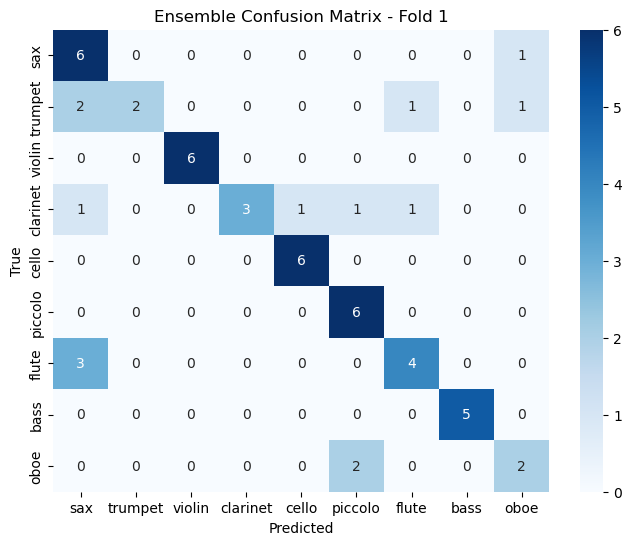

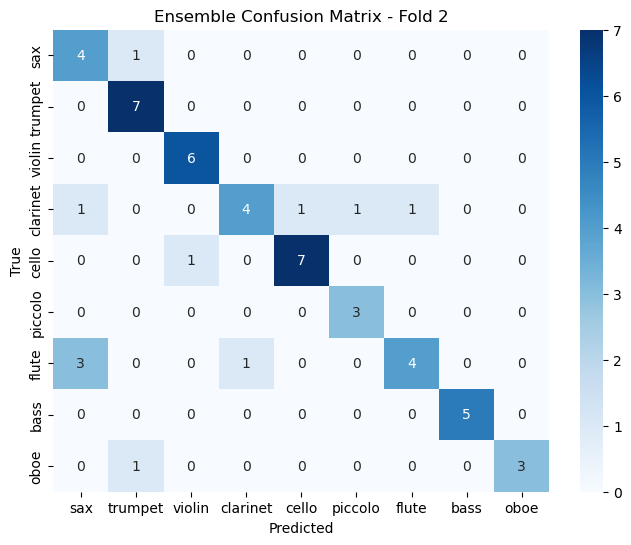

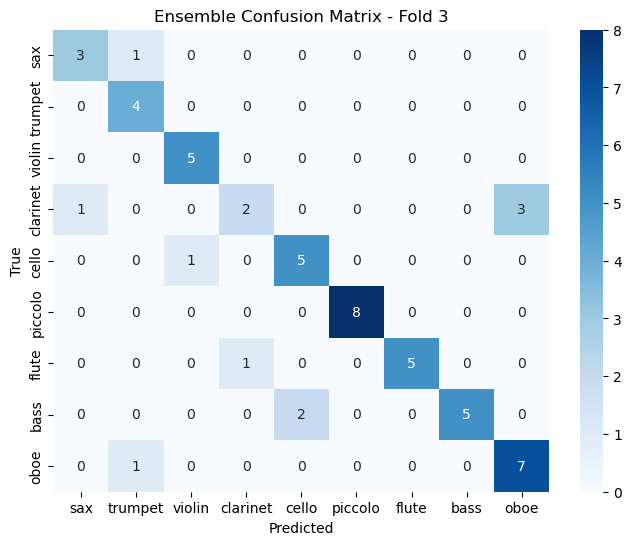

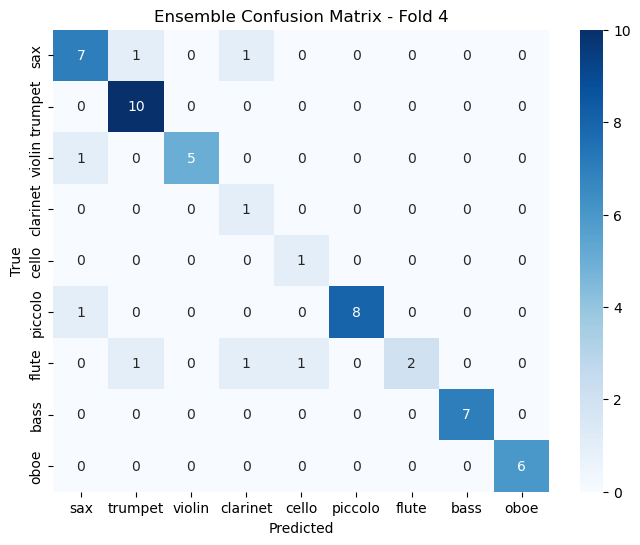

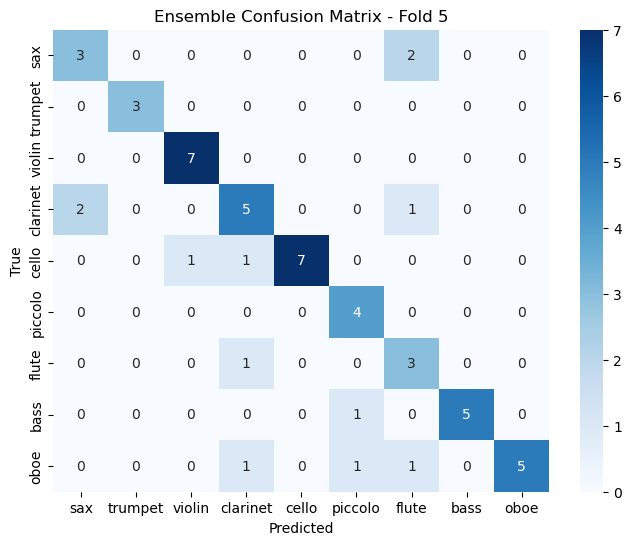

In [7]:
# Display ensemble confusion matrices for each fold
for i, conf_matrix in enumerate(ensemble_results['confusion_matrices']):
    plt.figure(figsize=(8, 6))
    sns.heatmap(np.array(conf_matrix), annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Ensemble Confusion Matrix - Fold {i+1}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [8]:
# Create a summary DataFrame for individual models
performance_data = []
for feature_type, results in individual_results.items():
    accuracies = results['accuracy_list']
    losses = results['loss_list']
    performance_data.append({
        'Feature Type': feature_type.replace('_', ' ').title(),
        'Mean Accuracy': np.mean(accuracies),
        'Std Accuracy': np.std(accuracies),
        'Min Accuracy': np.min(accuracies),
        'Max Accuracy': np.max(accuracies),
        'Mean Loss': np.mean(losses),
        'Std Loss': np.std(losses)
    })

performance_df = pd.DataFrame(performance_data)
performance_df = performance_df.sort_values('Mean Accuracy', ascending=False)
display(performance_df.round(4))

Feature Type  Mean Accuracy  Std Accuracy  Min Accuracy  \
8  Harmonic Percussive         0.6815        0.1801        0.3519   
6                  Cqt         0.6704        0.1024        0.5556   
5           Constant Q         0.6667        0.1054        0.5185   
0      Mel Spectrogram         0.5222        0.1743        0.3148   
1                 Mfcc         0.4926        0.2419        0.1852   
3    Spectral Contrast         0.4370        0.0669        0.3519   
7                 Stft         0.3000        0.1515        0.1111   
2           Chromagram         0.2667        0.0381        0.2037   
4              Tonnetz         0.1407        0.0728        0.0741   
9       Onset Strength         0.1037        0.0491        0.0370   

   Max Accuracy  Mean Loss  Std Loss  
8        0.8704   221.3580  114.2075  
6        0.8519    12.3598    4.9366  
5        0.7778     5.3106    3.2120  
0        0.8333    13.9982    5.1131  
1        0.7593     1.8552    0.7917  
3        0.5556     1.7131    0.1698  
7        0.5000    34.6416    9.6516  
2        0.2963     3.5455    0.7496  
4        0.2778     4.7663    1.1636  
9        0.1852     2.2613    0.1923


Mel Spectrogram Model
Accuracies: [0.48148149251937866, 0.42592594027519226, 0.8333333134651184, 0.31481480598449707, 0.5555555820465088]
Mean: 0.5222, Std: 0.1743, Min: 0.3148, Max: 0.8333


precision    recall  f1-score    support
sax            0.304348  1.000000  0.466667   7.000000
trumpet        0.000000  0.000000  0.000000   6.000000
violin         0.666667  1.000000  0.800000   6.000000
clarinet       1.000000  0.142857  0.250000   7.000000
cello          1.000000  0.333333  0.500000   6.000000
piccolo        0.714286  0.833333  0.769231   6.000000
flute          0.000000  0.000000  0.000000   7.000000
bass           1.000000  0.800000  0.888889   5.000000
oboe           0.200000  0.250000  0.222222   4.000000
accuracy       0.481481  0.481481  0.481481   0.481481
macro avg      0.542811  0.484392  0.433001  54.000000
weighted avg   0.541040  0.481481  0.421581  54.000000

precision    recall  f1-score    support
sax            0.222222  0.800000  0.347826   5.000000
trumpet        1.000000  0.428571  0.600000   7.000000
violin         1.000000  0.500000  0.666667   6.000000
clarinet       0.333333  0.375000  0.352941   8.000000
cello          0.461538  0.750000  0.571429   8.000000
piccolo        0.666667  0.666667  0.666667   3.000000
flute          0.250000  0.125000  0.166667   8.000000
bass           1.000000  0.200000  0.333333   5.000000
oboe           0.000000  0.000000  0.000000   4.000000
accuracy       0.425926  0.425926  0.425926   0.425926
macro avg      0.548196  0.427249  0.411725  54.000000
weighted avg   0.545742  0.425926  0.413594  54.000000

precision    recall  f1-score    support
sax            1.000000  1.000000  1.000000   4.000000
trumpet        1.000000  0.500000  0.666667   4.000000
violin         0.833333  1.000000  0.909091   5.000000
clarinet       1.000000  0.500000  0.666667   6.000000
cello          0.555556  0.833333  0.666667   6.000000
piccolo        1.000000  1.000000  1.000000   8.000000
flute          0.750000  1.000000  0.857143   6.000000
bass           1.000000  0.714286  0.833333   7.000000
oboe           0.777778  0.875000  0.823529   8.000000
accuracy       0.833333  0.833333  0.833333   0.833333
macro avg      0.879630  0.824735  0.824789  54.000000
weighted avg   0.874486  0.833333  0.829195  54.000000

precision    recall  f1-score    support
sax            0.200000  0.111111  0.142857   9.000000
trumpet        0.000000  0.000000  0.000000  10.000000
violin         0.000000  0.000000  0.000000   6.000000
clarinet       0.000000  0.000000  0.000000   1.000000
cello          0.062500  1.000000  0.117647   1.000000
piccolo        0.750000  0.333333  0.461538   9.000000
flute          0.166667  0.200000  0.181818   5.000000
bass           1.000000  1.000000  1.000000   7.000000
oboe           0.800000  0.666667  0.727273   6.000000
accuracy       0.314815  0.314815  0.314815   0.314815
macro avg      0.331019  0.367901  0.292348  54.000000
weighted avg   0.393441  0.314815  0.330184  54.000000

precision    recall  f1-score    support
sax            0.333333  0.200000  0.250000   5.000000
trumpet        1.000000  1.000000  1.000000   3.000000
violin         0.500000  1.000000  0.666667   7.000000
clarinet       0.000000  0.000000  0.000000   8.000000
cello          0.666667  0.444444  0.533333   9.000000
piccolo        0.800000  1.000000  0.888889   4.000000
flute          0.307692  1.000000  0.470588   4.000000
bass           1.000000  0.333333  0.500000   6.000000
oboe           0.625000  0.625000  0.625000   8.000000
accuracy       0.555556  0.555556  0.555556   0.555556
macro avg      0.581410  0.622531  0.548275  54.000000
weighted avg   0.548101  0.555556  0.502863  54.000000

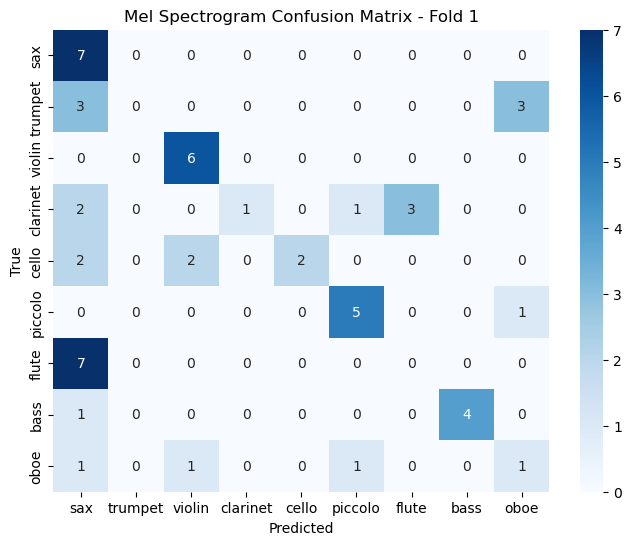

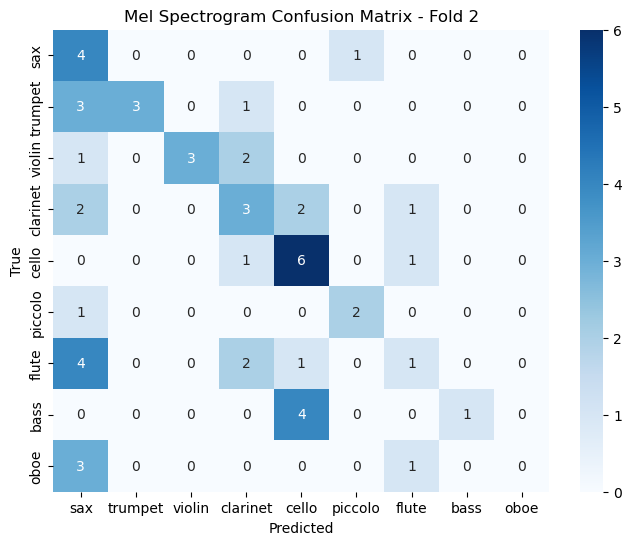

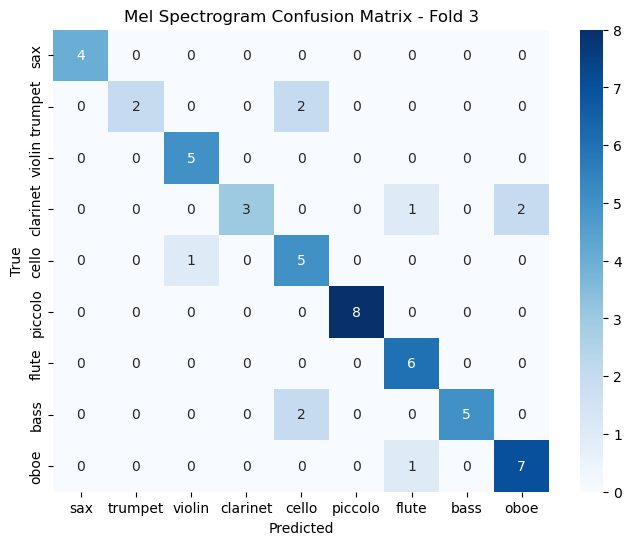

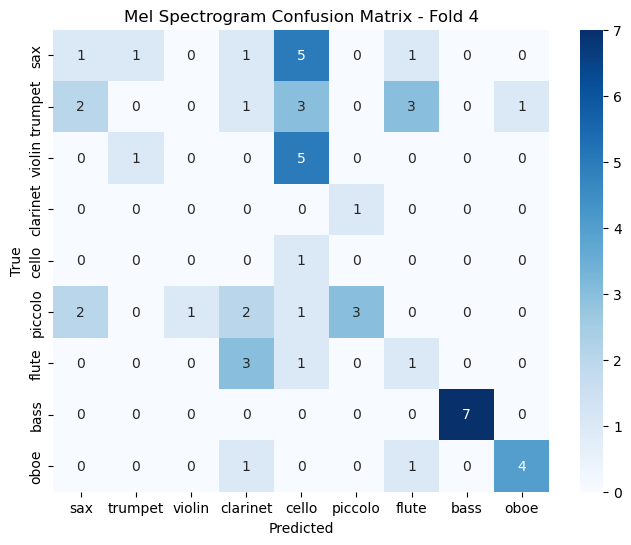

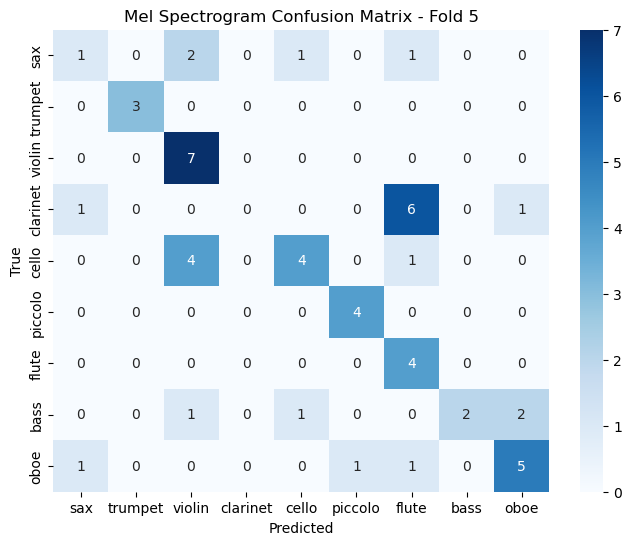


Mfcc Model
Accuracies: [0.24074074625968933, 0.7407407164573669, 0.5370370149612427, 0.7592592835426331, 0.18518517911434174]
Mean: 0.4926, Std: 0.2419, Min: 0.1852, Max: 0.7593


precision    recall  f1-score    support
sax            0.000000  0.000000  0.000000   7.000000
trumpet        1.000000  0.166667  0.285714   6.000000
violin         0.000000  0.000000  0.000000   6.000000
clarinet       0.000000  0.000000  0.000000   7.000000
cello          0.000000  0.000000  0.000000   6.000000
piccolo        0.153846  0.333333  0.210526   6.000000
flute          0.194444  1.000000  0.325581   7.000000
bass           1.000000  0.400000  0.571429   5.000000
oboe           0.500000  0.250000  0.333333   4.000000
accuracy       0.240741  0.240741  0.240741   0.240741
macro avg      0.316477  0.238889  0.191843  54.000000
weighted avg   0.283041  0.240741  0.174944  54.000000

precision    recall  f1-score    support
sax            0.600000  0.600000  0.600000   5.000000
trumpet        0.636364  1.000000  0.777778   7.000000
violin         1.000000  0.333333  0.500000   6.000000
clarinet       0.833333  0.625000  0.714286   8.000000
cello          0.888889  1.000000  0.941176   8.000000
piccolo        0.500000  1.000000  0.666667   3.000000
flute          0.750000  0.375000  0.500000   8.000000
bass           1.000000  1.000000  1.000000   5.000000
oboe           0.666667  1.000000  0.800000   4.000000
accuracy       0.740741  0.740741  0.740741   0.740741
macro avg      0.763917  0.770370  0.722212  54.000000
weighted avg   0.785166  0.740741  0.720151  54.000000

precision    recall  f1-score    support
sax            0.666667  0.500000  0.571429   4.000000
trumpet        0.666667  1.000000  0.800000   4.000000
violin         1.000000  0.400000  0.571429   5.000000
clarinet       0.166667  0.333333  0.222222   6.000000
cello          0.000000  0.000000  0.000000   6.000000
piccolo        0.888889  1.000000  0.941176   8.000000
flute          0.000000  0.000000  0.000000   6.000000
bass           1.000000  0.571429  0.727273   7.000000
oboe           0.388889  0.875000  0.538462   8.000000
accuracy       0.537037  0.537037  0.537037   0.537037
macro avg      0.530864  0.519974  0.485777  54.000000
weighted avg   0.528807  0.537037  0.492670  54.000000

precision    recall  f1-score    support
sax            0.875000  0.777778  0.823529   9.000000
trumpet        0.900000  0.900000  0.900000  10.000000
violin         1.000000  0.500000  0.666667   6.000000
clarinet       0.000000  0.000000  0.000000   1.000000
cello          0.500000  1.000000  0.666667   1.000000
piccolo        1.000000  0.888889  0.941176   9.000000
flute          1.000000  0.200000  0.333333   5.000000
bass           1.000000  0.857143  0.923077   7.000000
oboe           0.857143  1.000000  0.923077   6.000000
accuracy       0.759259  0.759259  0.759259   0.759259
macro avg      0.792460  0.680423  0.686392  54.000000
weighted avg   0.916997  0.759259  0.800290  54.000000

precision    recall  f1-score    support
sax            0.500000  0.200000  0.285714   5.000000
trumpet        1.000000  0.333333  0.500000   3.000000
violin         0.000000  0.000000  0.000000   7.000000
clarinet       0.177778  1.000000  0.301887   8.000000
cello          0.000000  0.000000  0.000000   9.000000
piccolo        0.000000  0.000000  0.000000   4.000000
flute          0.000000  0.000000  0.000000   4.000000
bass           0.000000  0.000000  0.000000   6.000000
oboe           0.000000  0.000000  0.000000   8.000000
accuracy       0.185185  0.185185  0.185185   0.185185
macro avg      0.186420  0.170370  0.120845  54.000000
weighted avg   0.128189  0.185185  0.098957  54.000000

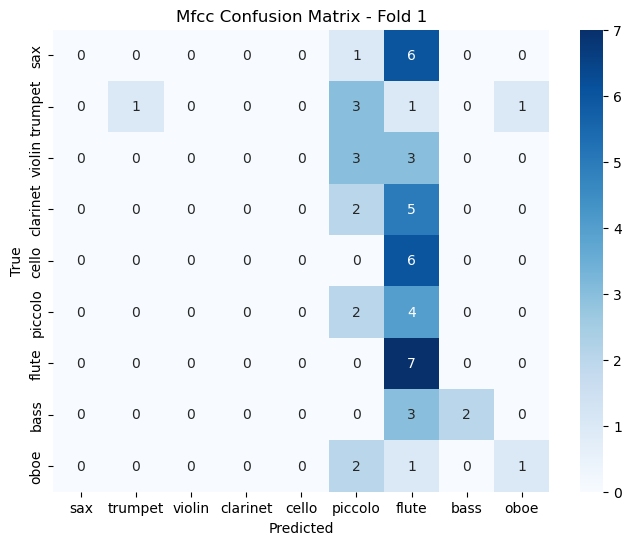

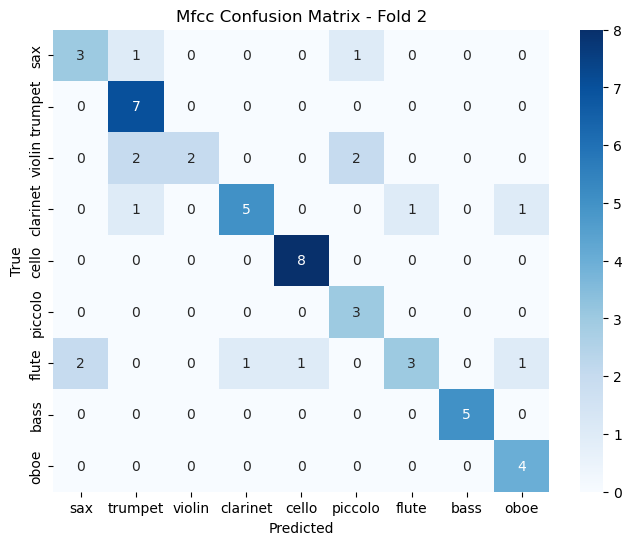

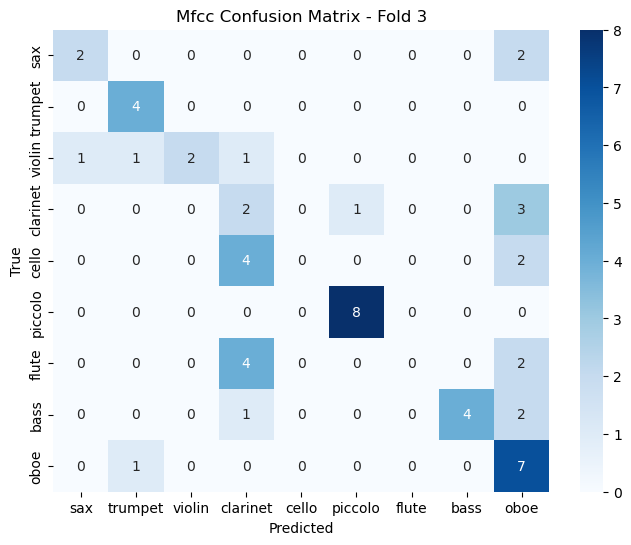

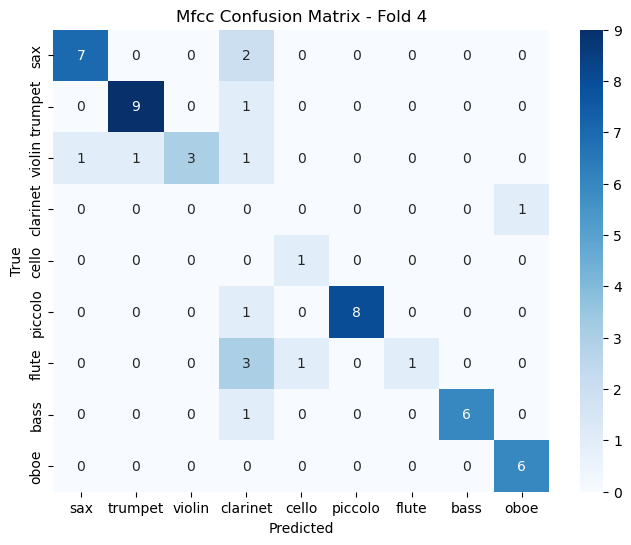

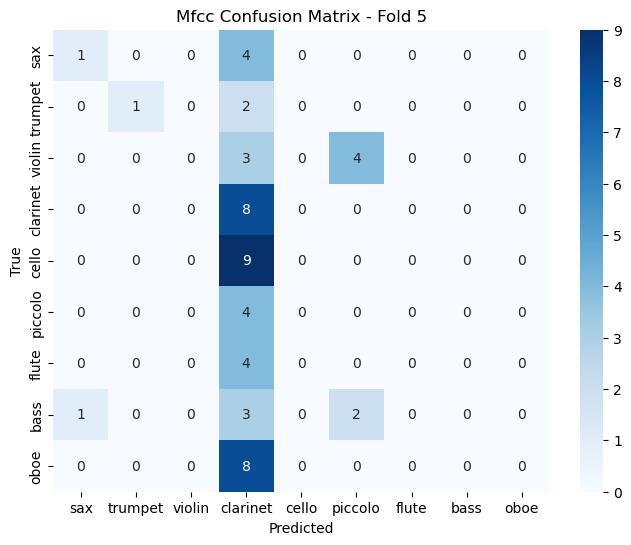


Chromagram Model
Accuracies: [0.29629629850387573, 0.20370370149612427, 0.29629629850387573, 0.29629629850387573, 0.24074074625968933]
Mean: 0.2667, Std: 0.0381, Min: 0.2037, Max: 0.2963


precision    recall  f1-score    support
sax            0.200000  0.142857  0.166667   7.000000
trumpet        0.000000  0.000000  0.000000   6.000000
violin         0.571429  0.666667  0.615385   6.000000
clarinet       0.000000  0.000000  0.000000   7.000000
cello          0.250000  0.500000  0.333333   6.000000
piccolo        0.333333  0.333333  0.333333   6.000000
flute          0.125000  0.142857  0.133333   7.000000
bass           0.571429  0.800000  0.666667   5.000000
oboe           0.166667  0.250000  0.200000   4.000000
accuracy       0.296296  0.296296  0.296296   0.296296
macro avg      0.246429  0.315079  0.272080  54.000000
weighted avg   0.235692  0.296296  0.257882  54.000000

precision    recall  f1-score    support
sax            0.125000  0.800000  0.216216   5.000000
trumpet        1.000000  0.142857  0.250000   7.000000
violin         0.000000  0.000000  0.000000   6.000000
clarinet       0.333333  0.125000  0.181818   8.000000
cello          0.333333  0.125000  0.181818   8.000000
piccolo        0.000000  0.000000  0.000000   3.000000
flute          0.166667  0.250000  0.200000   8.000000
bass           1.000000  0.200000  0.333333   5.000000
oboe           1.000000  0.250000  0.400000   4.000000
accuracy       0.203704  0.203704  0.203704   0.203704
macro avg      0.439815  0.210317  0.195910  54.000000
weighted avg   0.431327  0.203704  0.196423  54.000000

precision    recall  f1-score    support
sax            0.250000  0.250000  0.250000   4.000000
trumpet        0.400000  1.000000  0.571429   4.000000
violin         1.000000  0.200000  0.333333   5.000000
clarinet       0.111111  0.166667  0.133333   6.000000
cello          0.000000  0.000000  0.000000   6.000000
piccolo        0.333333  0.125000  0.181818   8.000000
flute          0.500000  0.166667  0.250000   6.000000
bass           1.000000  0.142857  0.250000   7.000000
oboe           0.260870  0.750000  0.387097   8.000000
accuracy       0.296296  0.296296  0.296296   0.296296
macro avg      0.428368  0.311243  0.261890  54.000000
weighted avg   0.426302  0.296296  0.250994  54.000000

precision    recall  f1-score    support
sax            0.500000  0.111111  0.181818   9.000000
trumpet        0.444444  0.400000  0.421053  10.000000
violin         0.166667  0.333333  0.222222   6.000000
clarinet       0.000000  0.000000  0.000000   1.000000
cello          0.000000  0.000000  0.000000   1.000000
piccolo        0.500000  0.222222  0.307692   9.000000
flute          0.500000  0.200000  0.285714   5.000000
bass           0.384615  0.714286  0.500000   7.000000
oboe           0.333333  0.166667  0.222222   6.000000
accuracy       0.296296  0.296296  0.296296   0.296296
macro avg      0.314340  0.238624  0.237858  54.000000
weighted avg   0.400681  0.296296  0.300210  54.000000

precision    recall  f1-score    support
sax            0.222222  0.400000  0.285714   5.000000
trumpet        0.000000  0.000000  0.000000   3.000000
violin         0.285714  0.857143  0.428571   7.000000
clarinet       0.000000  0.000000  0.000000   8.000000
cello          0.285714  0.222222  0.250000   9.000000
piccolo        0.166667  0.250000  0.200000   4.000000
flute          0.142857  0.250000  0.181818   4.000000
bass           0.333333  0.166667  0.222222   6.000000
oboe           0.000000  0.000000  0.000000   8.000000
accuracy       0.240741  0.240741  0.240741   0.240741
macro avg      0.159612  0.238448  0.174258  54.000000
weighted avg   0.165197  0.240741  0.176651  54.000000

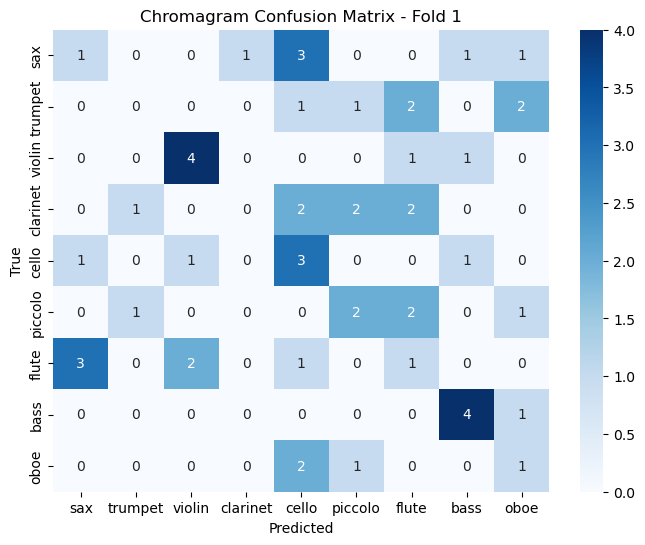

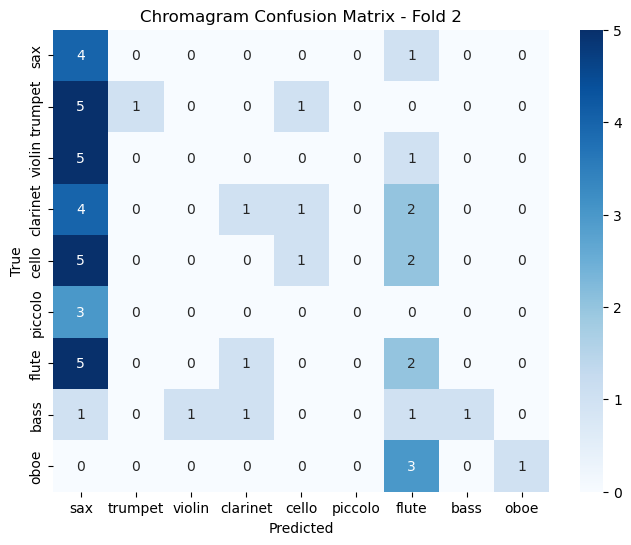

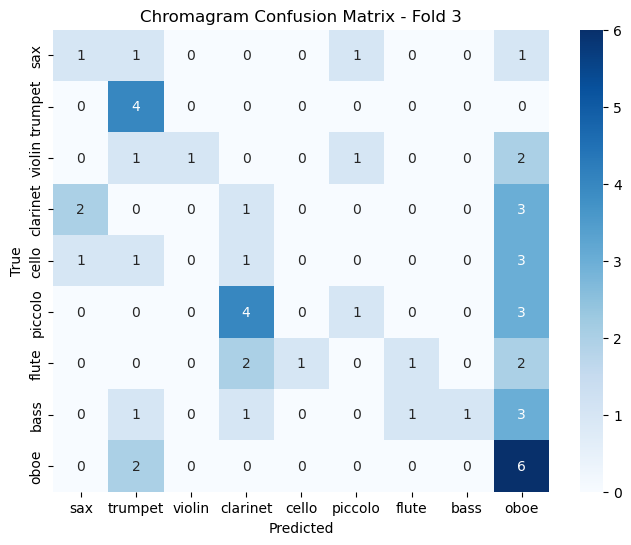

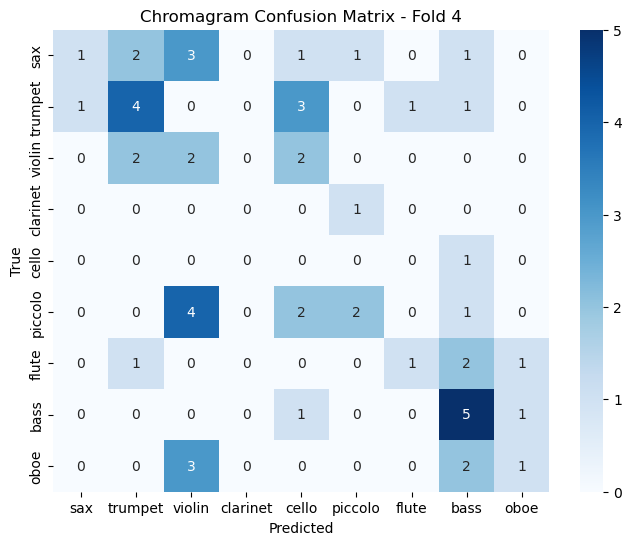

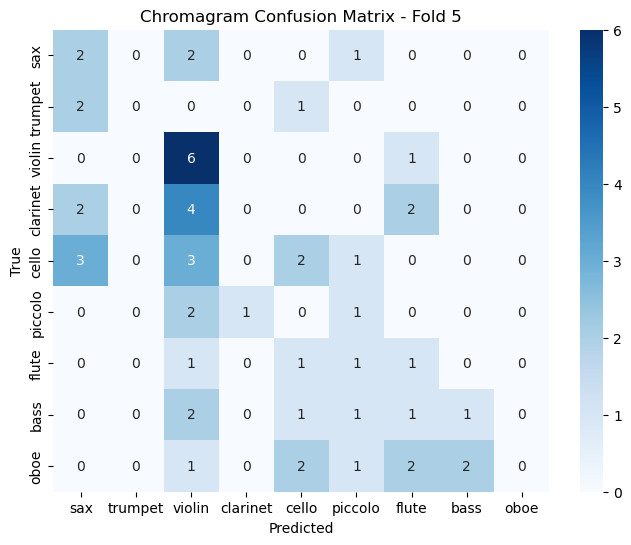


Spectral Contrast Model
Accuracies: [0.40740740299224854, 0.35185185074806213, 0.5555555820465088, 0.4444444477558136, 0.42592594027519226]
Mean: 0.4370, Std: 0.0669, Min: 0.3519, Max: 0.5556


precision    recall  f1-score    support
sax            0.000000  0.000000  0.000000   7.000000
trumpet        0.000000  0.000000  0.000000   6.000000
violin         0.000000  0.000000  0.000000   6.000000
clarinet       0.200000  0.285714  0.235294   7.000000
cello          0.750000  0.500000  0.600000   6.000000
piccolo        0.315789  1.000000  0.480000   6.000000
flute          0.375000  0.857143  0.521739   7.000000
bass           1.000000  1.000000  1.000000   5.000000
oboe           0.000000  0.000000  0.000000   4.000000
accuracy       0.407407  0.407407  0.407407   0.407407
macro avg      0.293421  0.404762  0.315226  54.000000
weighted avg   0.285551  0.407407  0.310727  54.000000

precision    recall  f1-score    support
sax            0.000000  0.000000  0.000000   5.000000
trumpet        1.000000  0.142857  0.250000   7.000000
violin         0.333333  0.333333  0.333333   6.000000
clarinet       0.666667  0.250000  0.363636   8.000000
cello          0.380952  1.000000  0.551724   8.000000
piccolo        0.500000  0.333333  0.400000   3.000000
flute          0.333333  0.125000  0.181818   8.000000
bass           1.000000  0.400000  0.571429   5.000000
oboe           0.125000  0.500000  0.200000   4.000000
accuracy       0.351852  0.351852  0.351852   0.351852
macro avg      0.482143  0.342725  0.316882  54.000000
weighted avg   0.500882  0.351852  0.321937  54.000000

precision    recall  f1-score    support
sax            0.666667  1.000000  0.800000   4.000000
trumpet        1.000000  0.500000  0.666667   4.000000
violin         1.000000  0.200000  0.333333   5.000000
clarinet       0.500000  0.333333  0.400000   6.000000
cello          0.000000  0.000000  0.000000   6.000000
piccolo        0.400000  1.000000  0.571429   8.000000
flute          0.555556  0.833333  0.666667   6.000000
bass           0.666667  0.857143  0.750000   7.000000
oboe           0.666667  0.250000  0.363636   8.000000
accuracy       0.555556  0.555556  0.555556   0.555556
macro avg      0.606173  0.552646  0.505748  54.000000
weighted avg   0.577778  0.555556  0.493775  54.000000

precision    recall  f1-score    support
sax            0.384615  0.555556  0.454545   9.000000
trumpet        0.666667  0.800000  0.727273  10.000000
violin         0.000000  0.000000  0.000000   6.000000
clarinet       0.000000  0.000000  0.000000   1.000000
cello          0.000000  0.000000  0.000000   1.000000
piccolo        1.000000  0.111111  0.200000   9.000000
flute          0.000000  0.000000  0.000000   5.000000
bass           0.636364  1.000000  0.777778   7.000000
oboe           0.272727  0.500000  0.352941   6.000000
accuracy       0.444444  0.444444  0.444444   0.444444
macro avg      0.328930  0.329630  0.279171  54.000000
weighted avg   0.467021  0.444444  0.383810  54.000000

precision    recall  f1-score    support
sax            0.666667  0.400000  0.500000   5.000000
trumpet        0.000000  0.000000  0.000000   3.000000
violin         0.666667  0.571429  0.615385   7.000000
clarinet       0.375000  0.375000  0.375000   8.000000
cello          0.400000  0.444444  0.421053   9.000000
piccolo        0.000000  0.000000  0.000000   4.000000
flute          0.333333  0.250000  0.285714   4.000000
bass           0.666667  1.000000  0.800000   6.000000
oboe           0.272727  0.375000  0.315789   8.000000
accuracy       0.425926  0.425926  0.425926   0.425926
macro avg      0.375673  0.379541  0.368105  54.000000
weighted avg   0.409540  0.425926  0.408636  54.000000

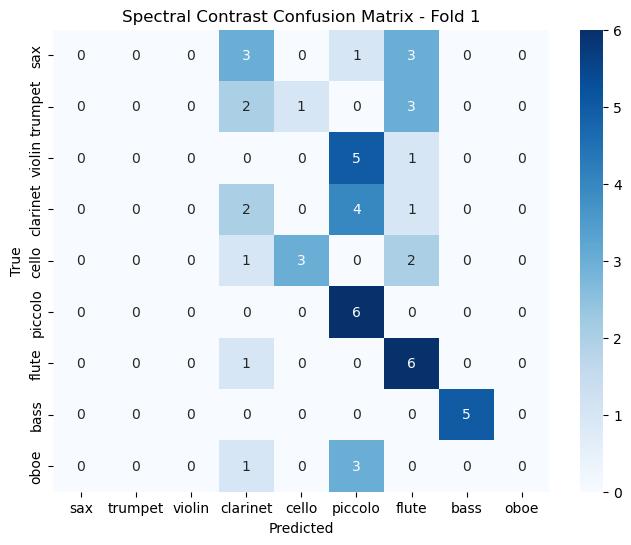

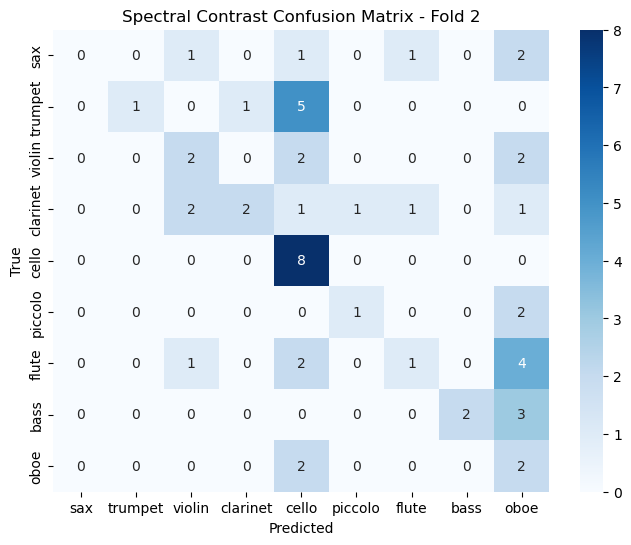

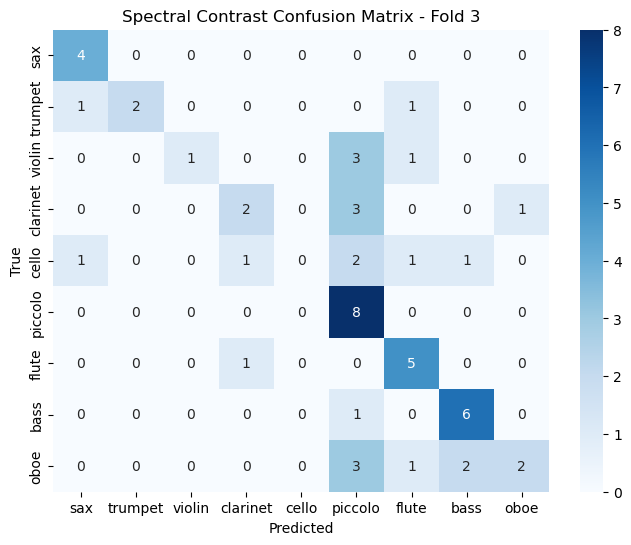

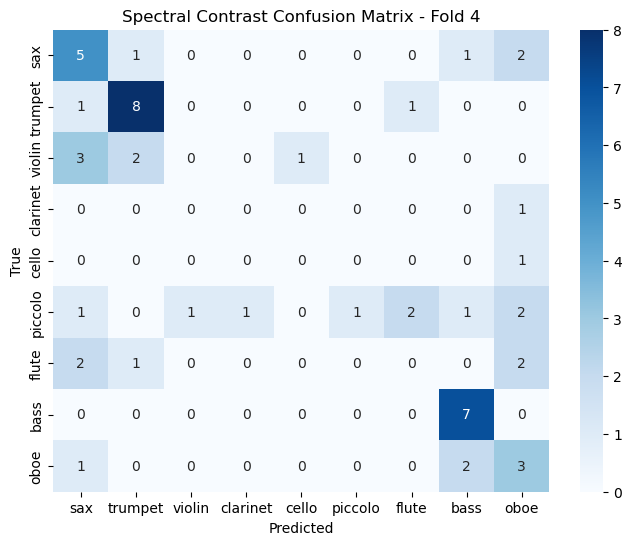

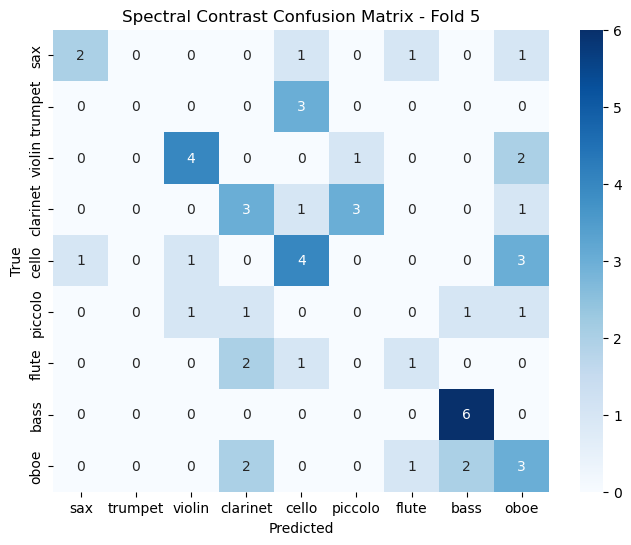


Tonnetz Model
Accuracies: [0.09259258955717087, 0.07407407462596893, 0.1111111119389534, 0.14814814925193787, 0.2777777910232544]
Mean: 0.1407, Std: 0.0728, Min: 0.0741, Max: 0.2778


precision    recall  f1-score    support
sax            0.000000  0.000000  0.000000   7.000000
trumpet        0.000000  0.000000  0.000000   6.000000
violin         0.000000  0.000000  0.000000   6.000000
clarinet       0.000000  0.000000  0.000000   7.000000
cello          0.333333  0.166667  0.222222   6.000000
piccolo        0.000000  0.000000  0.000000   6.000000
flute          0.000000  0.000000  0.000000   7.000000
bass           0.137931  0.800000  0.235294   5.000000
oboe           0.000000  0.000000  0.000000   4.000000
accuracy       0.092593  0.092593  0.092593   0.092593
macro avg      0.052363  0.107407  0.050835  54.000000
weighted avg   0.049808  0.092593  0.046478  54.000000

precision    recall  f1-score    support
sax            0.047619  0.200000  0.076923   5.000000
trumpet        0.000000  0.000000  0.000000   7.000000
violin         0.142857  0.333333  0.200000   6.000000
clarinet       0.000000  0.000000  0.000000   8.000000
cello          0.000000  0.000000  0.000000   8.000000
piccolo        0.000000  0.000000  0.000000   3.000000
flute          0.000000  0.000000  0.000000   8.000000
bass           0.100000  0.200000  0.133333   5.000000
oboe           0.000000  0.000000  0.000000   4.000000
accuracy       0.074074  0.074074  0.074074   0.074074
macro avg      0.032275  0.081481  0.045584  54.000000
weighted avg   0.029541  0.074074  0.041690  54.000000

precision    recall  f1-score    support
sax            0.000000  0.000000  0.000000   4.000000
trumpet        0.000000  0.000000  0.000000   4.000000
violin         0.000000  0.000000  0.000000   5.000000
clarinet       0.000000  0.000000  0.000000   6.000000
cello          0.136364  0.500000  0.214286   6.000000
piccolo        0.000000  0.000000  0.000000   8.000000
flute          0.000000  0.000000  0.000000   6.000000
bass           0.166667  0.428571  0.240000   7.000000
oboe           0.000000  0.000000  0.000000   8.000000
accuracy       0.111111  0.111111  0.111111   0.111111
macro avg      0.033670  0.103175  0.050476  54.000000
weighted avg   0.036756  0.111111  0.054921  54.000000

precision    recall  f1-score    support
sax            0.142857  0.222222  0.173913   9.000000
trumpet        0.000000  0.000000  0.000000  10.000000
violin         0.000000  0.000000  0.000000   6.000000
clarinet       0.000000  0.000000  0.000000   1.000000
cello          0.000000  0.000000  0.000000   1.000000
piccolo        0.000000  0.000000  0.000000   9.000000
flute          0.333333  0.200000  0.250000   5.000000
bass           0.333333  0.428571  0.375000   7.000000
oboe           0.666667  0.333333  0.444444   6.000000
accuracy       0.148148  0.148148  0.148148   0.148148
macro avg      0.164021  0.131570  0.138151  54.000000
weighted avg   0.171958  0.148148  0.150127  54.000000

precision    recall  f1-score    support
sax            0.071429  0.200000  0.105263   5.000000
trumpet        0.142857  0.333333  0.200000   3.000000
violin         0.500000  0.142857  0.222222   7.000000
clarinet       0.500000  0.375000  0.428571   8.000000
cello          0.333333  0.222222  0.266667   9.000000
piccolo        0.000000  0.000000  0.000000   4.000000
flute          0.000000  0.000000  0.000000   4.000000
bass           0.363636  0.666667  0.470588   6.000000
oboe           0.500000  0.375000  0.428571   8.000000
accuracy       0.277778  0.277778  0.277778   0.277778
macro avg      0.267917  0.257231  0.235765  54.000000
weighted avg   0.323473  0.277778  0.273380  54.000000

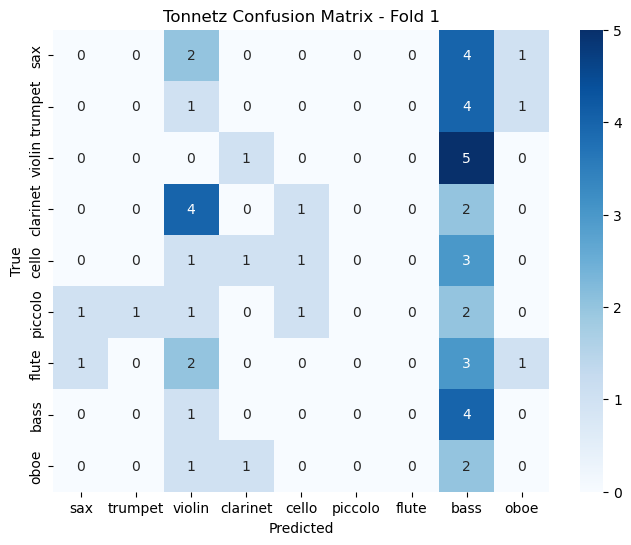

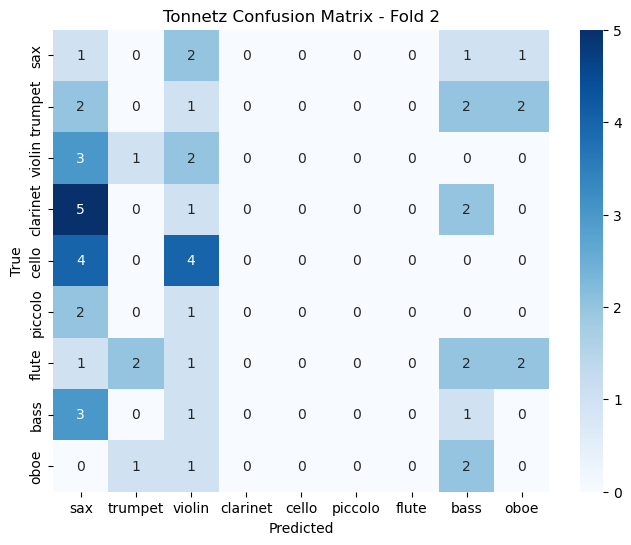

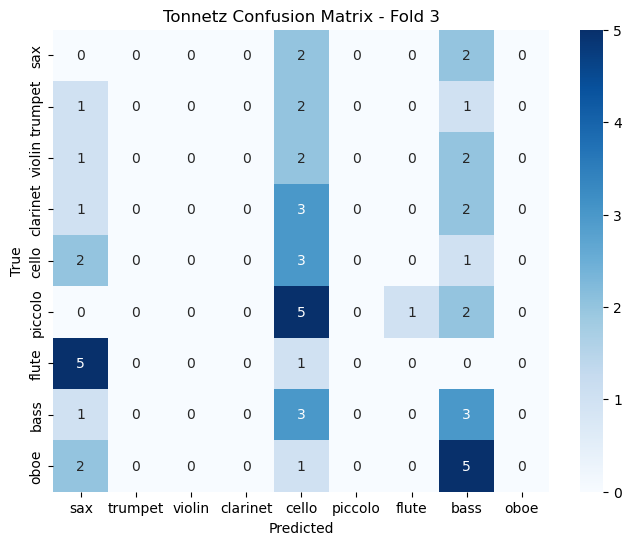

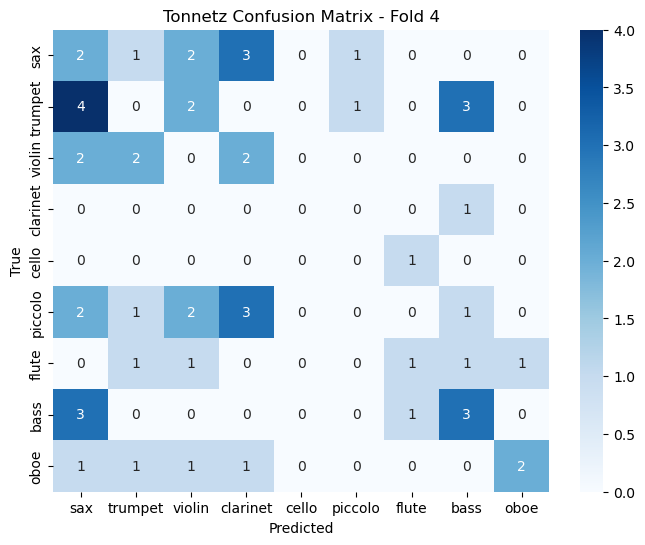

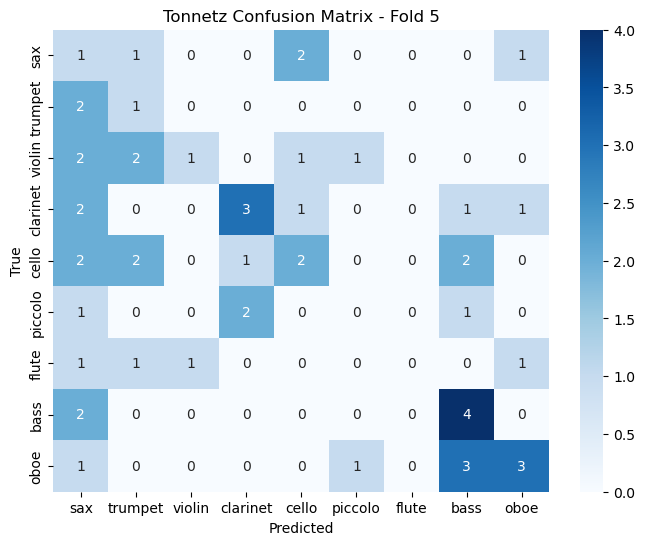


Constant Q Model
Accuracies: [0.5740740895271301, 0.6851851940155029, 0.7777777910232544, 0.7777777910232544, 0.5185185074806213]
Mean: 0.6667, Std: 0.1054, Min: 0.5185, Max: 0.7778


precision    recall  f1-score    support
sax            0.666667  0.285714  0.400000   7.000000
trumpet        1.000000  0.166667  0.285714   6.000000
violin         1.000000  0.666667  0.800000   6.000000
clarinet       0.250000  0.714286  0.370370   7.000000
cello          0.666667  1.000000  0.800000   6.000000
piccolo        1.000000  0.166667  0.285714   6.000000
flute          0.714286  0.714286  0.714286   7.000000
bass           0.714286  1.000000  0.833333   5.000000
oboe           1.000000  0.500000  0.666667   4.000000
accuracy       0.574074  0.574074  0.574074   0.574074
macro avg      0.779101  0.579365  0.572898  54.000000
weighted avg   0.759039  0.574074  0.560268  54.000000

precision    recall  f1-score    support
sax            1.000000  0.400000  0.571429   5.000000
trumpet        0.388889  1.000000  0.560000   7.000000
violin         1.000000  1.000000  1.000000   6.000000
clarinet       0.800000  0.500000  0.615385   8.000000
cello          0.666667  0.500000  0.571429   8.000000
piccolo        0.750000  1.000000  0.857143   3.000000
flute          0.750000  0.750000  0.750000   8.000000
bass           1.000000  0.800000  0.888889   5.000000
oboe           1.000000  0.250000  0.400000   4.000000
accuracy       0.685185  0.685185  0.685185   0.685185
macro avg      0.817284  0.688889  0.690475  54.000000
weighted avg   0.790844  0.685185  0.683102  54.000000

precision    recall  f1-score    support
sax            1.000000  1.000000  1.000000   4.000000
trumpet        0.800000  1.000000  0.888889   4.000000
violin         1.000000  1.000000  1.000000   5.000000
clarinet       0.428571  0.500000  0.461538   6.000000
cello          0.857143  1.000000  0.923077   6.000000
piccolo        1.000000  0.375000  0.545455   8.000000
flute          0.666667  0.666667  0.666667   6.000000
bass           1.000000  0.857143  0.923077   7.000000
oboe           0.636364  0.875000  0.736842   8.000000
accuracy       0.777778  0.777778  0.777778   0.777778
macro avg      0.820972  0.808201  0.793949  54.000000
weighted avg   0.814911  0.777778  0.770059  54.000000

precision    recall  f1-score    support
sax            1.000000  0.888889  0.941176   9.000000
trumpet        1.000000  1.000000  1.000000  10.000000
violin         0.833333  0.833333  0.833333   6.000000
clarinet       0.111111  1.000000  0.200000   1.000000
cello          1.000000  1.000000  1.000000   1.000000
piccolo        1.000000  0.444444  0.615385   9.000000
flute          1.000000  0.200000  0.333333   5.000000
bass           1.000000  0.857143  0.923077   7.000000
oboe           0.666667  1.000000  0.800000   6.000000
accuracy       0.777778  0.777778  0.777778   0.777778
macro avg      0.845679  0.802646  0.738478  54.000000
weighted avg   0.927984  0.777778  0.798838  54.000000

precision    recall  f1-score    support
sax            0.500000  0.600000  0.545455   5.000000
trumpet        0.000000  0.000000  0.000000   3.000000
violin         1.000000  0.142857  0.250000   7.000000
clarinet       0.375000  0.750000  0.500000   8.000000
cello          0.666667  0.888889  0.761905   9.000000
piccolo        1.000000  0.250000  0.400000   4.000000
flute          0.125000  0.250000  0.166667   4.000000
bass           1.000000  0.666667  0.800000   6.000000
oboe           0.666667  0.500000  0.571429   8.000000
accuracy       0.518519  0.518519  0.518519   0.518519
macro avg      0.592593  0.449824  0.443939  54.000000
weighted avg   0.635802  0.518519  0.499491  54.000000

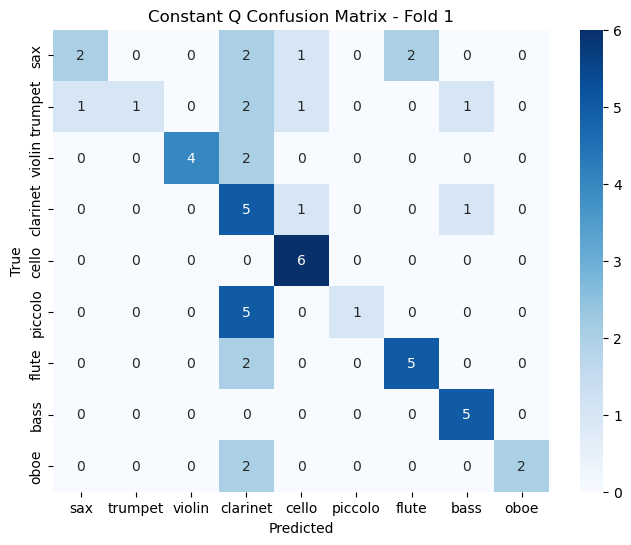

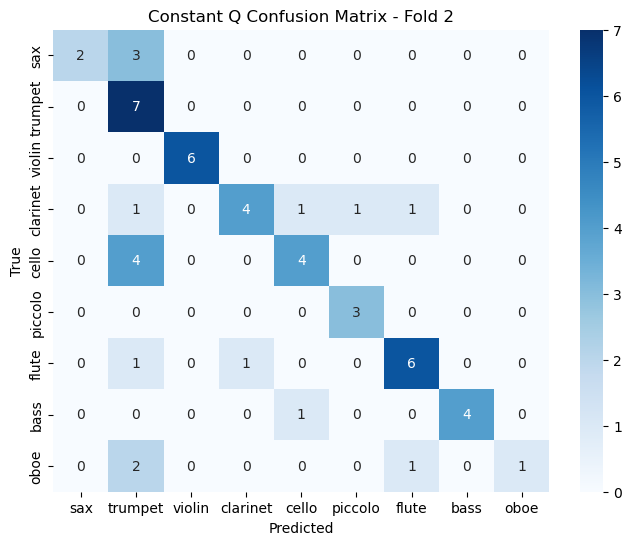

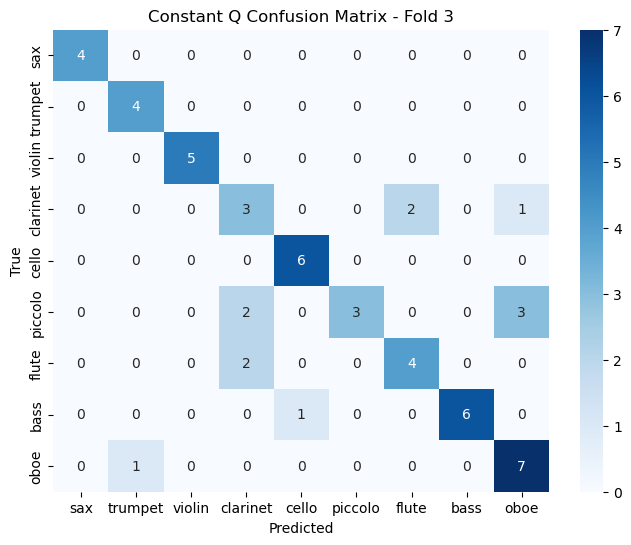

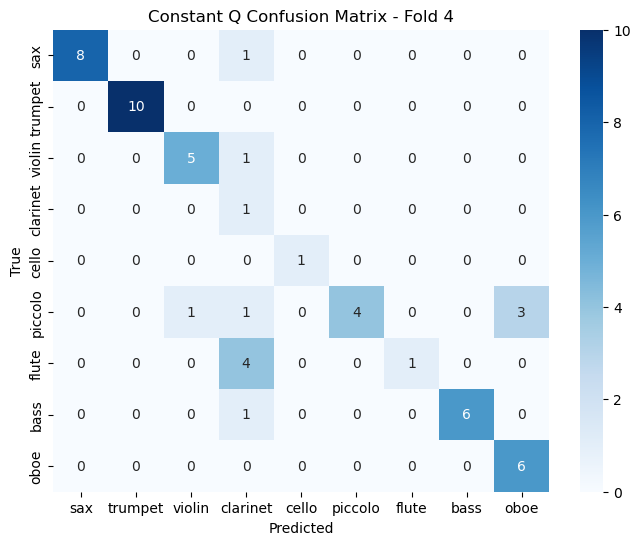

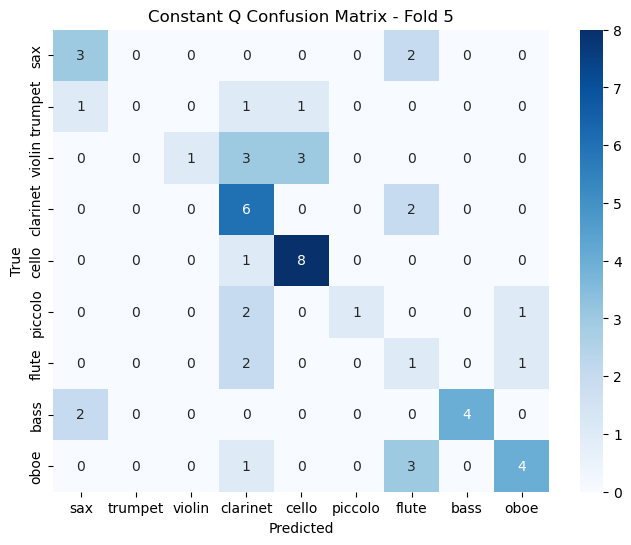


Cqt Model
Accuracies: [0.6851851940155029, 0.6666666865348816, 0.5555555820465088, 0.5925925970077515, 0.8518518805503845]
Mean: 0.6704, Std: 0.1024, Min: 0.5556, Max: 0.8519


precision    recall  f1-score    support
sax            0.461538  0.857143  0.600000   7.000000
trumpet        0.666667  0.333333  0.444444   6.000000
violin         0.857143  1.000000  0.923077   6.000000
clarinet       1.000000  0.571429  0.727273   7.000000
cello          1.000000  0.833333  0.909091   6.000000
piccolo        1.000000  0.333333  0.500000   6.000000
flute          0.666667  0.571429  0.615385   7.000000
bass           1.000000  0.800000  0.888889   5.000000
oboe           0.400000  1.000000  0.571429   4.000000
accuracy       0.685185  0.685185  0.685185   0.685185
macro avg      0.783557  0.700000  0.686621  54.000000
weighted avg   0.789635  0.685185  0.684971  54.000000

precision    recall  f1-score    support
sax            0.250000  0.200000  0.222222   5.000000
trumpet        0.583333  1.000000  0.736842   7.000000
violin         0.666667  1.000000  0.800000   6.000000
clarinet       1.000000  0.375000  0.545455   8.000000
cello          0.857143  0.750000  0.800000   8.000000
piccolo        0.500000  1.000000  0.666667   3.000000
flute          0.666667  0.250000  0.363636   8.000000
bass           1.000000  1.000000  1.000000   5.000000
oboe           0.600000  0.750000  0.666667   4.000000
accuracy       0.666667  0.666667  0.666667   0.666667
macro avg      0.680423  0.702778  0.644610  54.000000
weighted avg   0.711552  0.666667  0.637193  54.000000

precision    recall  f1-score    support
sax            0.428571  0.750000  0.545455   4.000000
trumpet        0.333333  0.750000  0.461538   4.000000
violin         1.000000  0.400000  0.571429   5.000000
clarinet       0.500000  0.166667  0.250000   6.000000
cello          0.600000  0.500000  0.545455   6.000000
piccolo        1.000000  0.500000  0.666667   8.000000
flute          0.400000  1.000000  0.571429   6.000000
bass           1.000000  0.571429  0.727273   7.000000
oboe           0.666667  0.500000  0.571429   8.000000
accuracy       0.555556  0.555556  0.555556   0.555556
macro avg      0.658730  0.570899  0.545630  54.000000
weighted avg   0.692240  0.555556  0.557076  54.000000

precision    recall  f1-score    support
sax            0.375000  0.666667  0.480000   9.000000
trumpet        0.571429  0.400000  0.470588  10.000000
violin         0.500000  0.166667  0.250000   6.000000
clarinet       1.000000  1.000000  1.000000   1.000000
cello          0.250000  1.000000  0.400000   1.000000
piccolo        0.636364  0.777778  0.700000   9.000000
flute          1.000000  0.200000  0.333333   5.000000
bass           1.000000  1.000000  1.000000   7.000000
oboe           0.800000  0.666667  0.727273   6.000000
accuracy       0.592593  0.592593  0.592593   0.592593
macro avg      0.681421  0.653086  0.595688  54.000000
weighted avg   0.664196  0.592593  0.578818  54.000000

precision    recall  f1-score    support
sax            0.714286  1.000000  0.833333   5.000000
trumpet        0.750000  1.000000  0.857143   3.000000
violin         1.000000  1.000000  1.000000   7.000000
clarinet       0.833333  0.625000  0.714286   8.000000
cello          1.000000  0.888889  0.941176   9.000000
piccolo        0.666667  1.000000  0.800000   4.000000
flute          0.500000  0.500000  0.500000   4.000000
bass           1.000000  1.000000  1.000000   6.000000
oboe           1.000000  0.750000  0.857143   8.000000
accuracy       0.851852  0.851852  0.851852   0.851852
macro avg      0.829365  0.862654  0.833676  54.000000
weighted avg   0.873236  0.851852  0.851484  54.000000

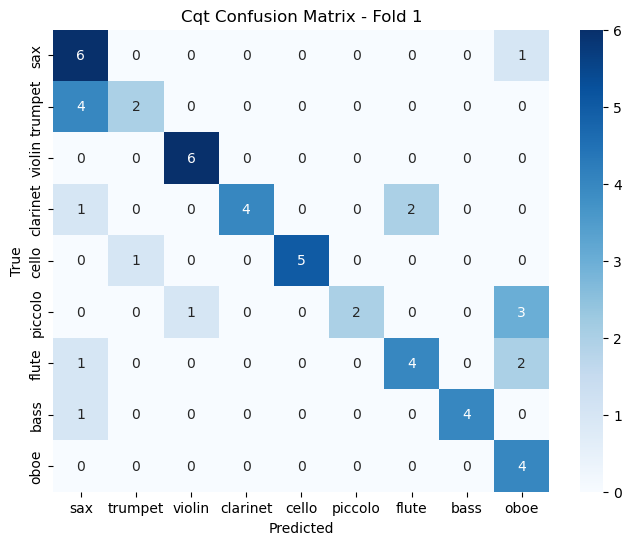

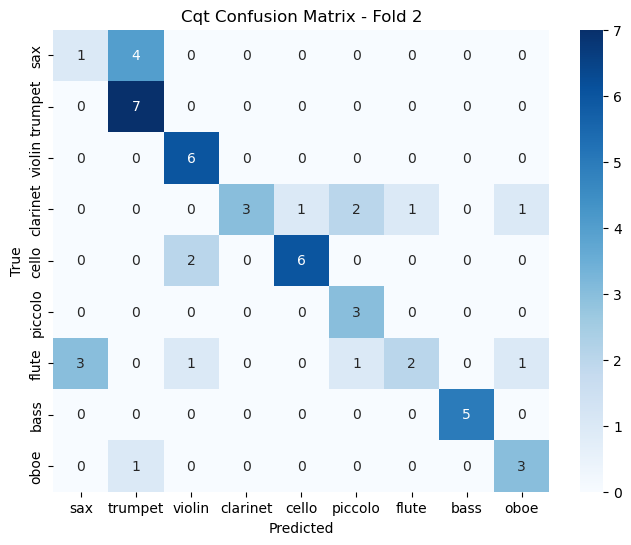

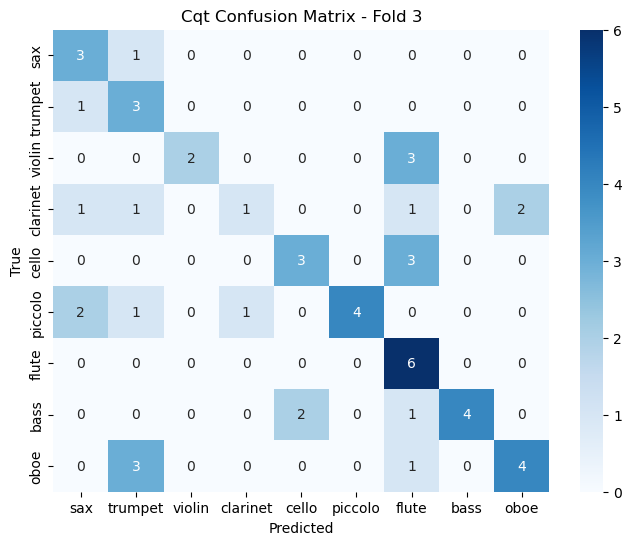

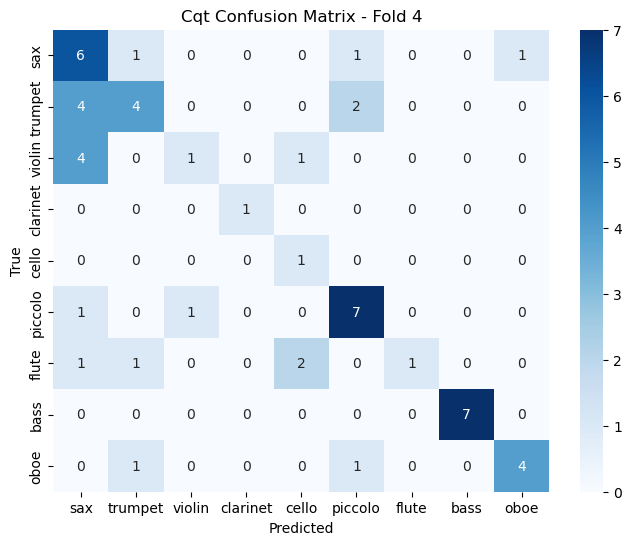

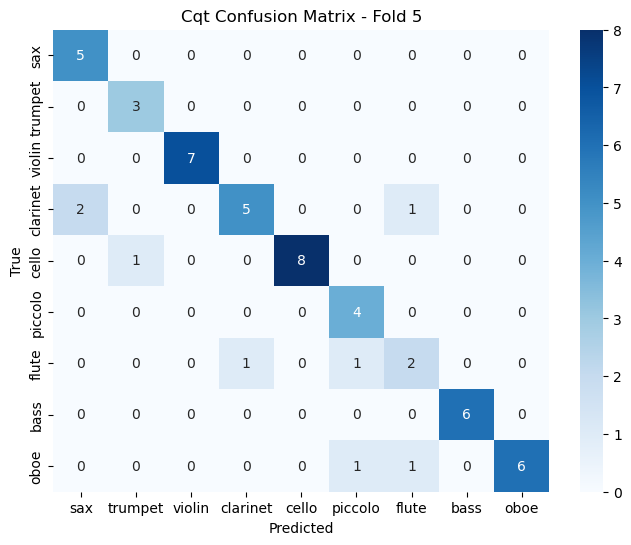


Stft Model
Accuracies: [0.1111111119389534, 0.5, 0.42592594027519226, 0.14814814925193787, 0.31481480598449707]
Mean: 0.3000, Std: 0.1515, Min: 0.1111, Max: 0.5000


precision    recall  f1-score    support
sax            0.000000  0.000000  0.000000   7.000000
trumpet        0.250000  0.166667  0.200000   6.000000
violin         0.125000  0.333333  0.181818   6.000000
clarinet       0.000000  0.000000  0.000000   7.000000
cello          0.000000  0.000000  0.000000   6.000000
piccolo        0.096774  0.500000  0.162162   6.000000
flute          0.000000  0.000000  0.000000   7.000000
bass           0.000000  0.000000  0.000000   5.000000
oboe           0.000000  0.000000  0.000000   4.000000
accuracy       0.111111  0.111111  0.111111   0.111111
macro avg      0.052419  0.111111  0.060442  54.000000
weighted avg   0.052419  0.111111  0.060442  54.000000

precision    recall  f1-score  support
sax            0.285714  0.800000  0.421053      5.0
trumpet        1.000000  0.285714  0.444444      7.0
violin         0.352941  1.000000  0.521739      6.0
clarinet       0.666667  0.250000  0.363636      8.0
cello          1.000000  0.625000  0.769231      8.0
piccolo        0.428571  1.000000  0.600000      3.0
flute          1.000000  0.125000  0.222222      8.0
bass           1.000000  0.600000  0.750000      5.0
oboe           0.500000  0.250000  0.333333      4.0
accuracy       0.500000  0.500000  0.500000      0.5
macro avg      0.692655  0.548413  0.491740     54.0
weighted avg   0.743801  0.500000  0.482794     54.0

precision    recall  f1-score    support
sax            0.090909  0.250000  0.133333   4.000000
trumpet        1.000000  1.000000  1.000000   4.000000
violin         0.227273  1.000000  0.370370   5.000000
clarinet       0.333333  0.166667  0.222222   6.000000
cello          0.000000  0.000000  0.000000   6.000000
piccolo        0.800000  1.000000  0.888889   8.000000
flute          0.000000  0.000000  0.000000   6.000000
bass           1.000000  0.571429  0.727273   7.000000
oboe           0.000000  0.000000  0.000000   8.000000
accuracy       0.425926  0.425926  0.425926   0.425926
macro avg      0.383502  0.443122  0.371343  54.000000
weighted avg   0.387037  0.425926  0.368899  54.000000

precision    recall  f1-score    support
sax            0.000000  0.000000  0.000000   9.000000
trumpet        0.142857  0.100000  0.117647  10.000000
violin         0.150000  1.000000  0.260870   6.000000
clarinet       0.000000  0.000000  0.000000   1.000000
cello          0.000000  0.000000  0.000000   1.000000
piccolo        1.000000  0.111111  0.200000   9.000000
flute          0.000000  0.000000  0.000000   5.000000
bass           0.000000  0.000000  0.000000   7.000000
oboe           0.000000  0.000000  0.000000   6.000000
accuracy       0.148148  0.148148  0.148148   0.148148
macro avg      0.143651  0.134568  0.064280  54.000000
weighted avg   0.209788  0.148148  0.084105  54.000000

precision    recall  f1-score    support
sax            0.000000  0.000000  0.000000   5.000000
trumpet        0.000000  0.000000  0.000000   3.000000
violin         0.318182  1.000000  0.482759   7.000000
clarinet       0.000000  0.000000  0.000000   8.000000
cello          0.000000  0.000000  0.000000   9.000000
piccolo        0.250000  0.500000  0.333333   4.000000
flute          0.000000  0.000000  0.000000   4.000000
bass           0.200000  0.500000  0.285714   6.000000
oboe           0.555556  0.625000  0.588235   8.000000
accuracy       0.314815  0.314815  0.314815   0.314815
macro avg      0.147082  0.291667  0.187782  54.000000
weighted avg   0.164291  0.314815  0.206163  54.000000

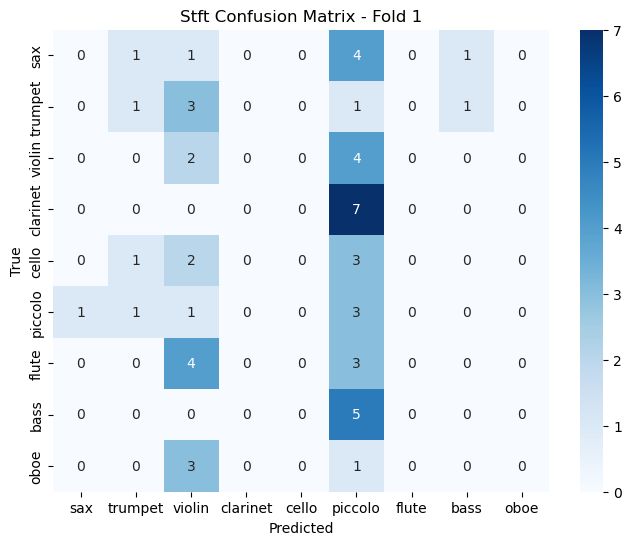

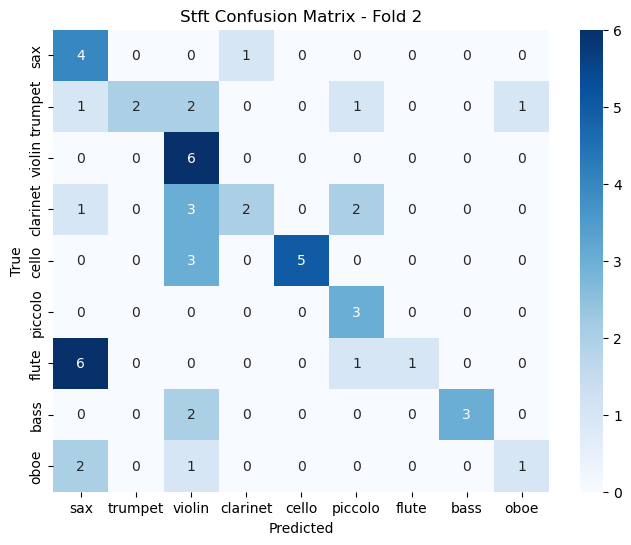

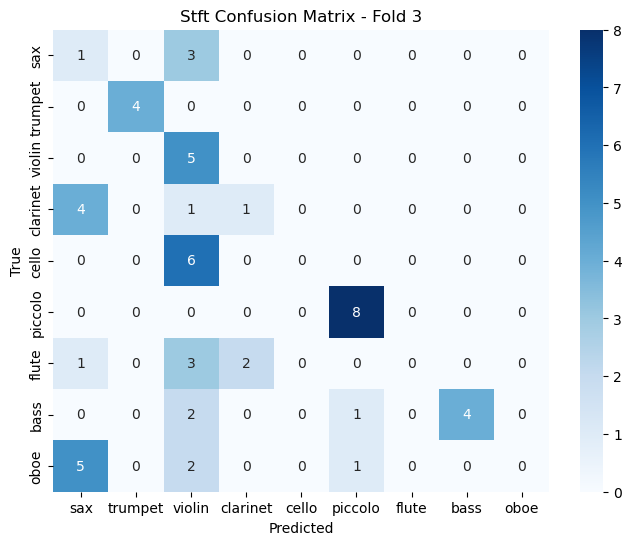

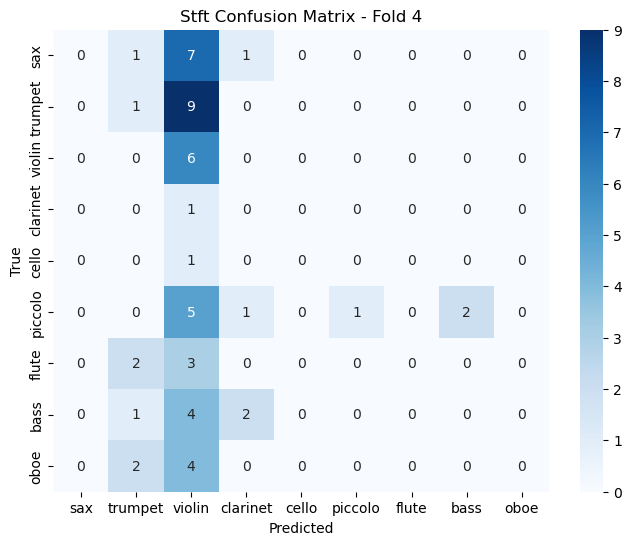

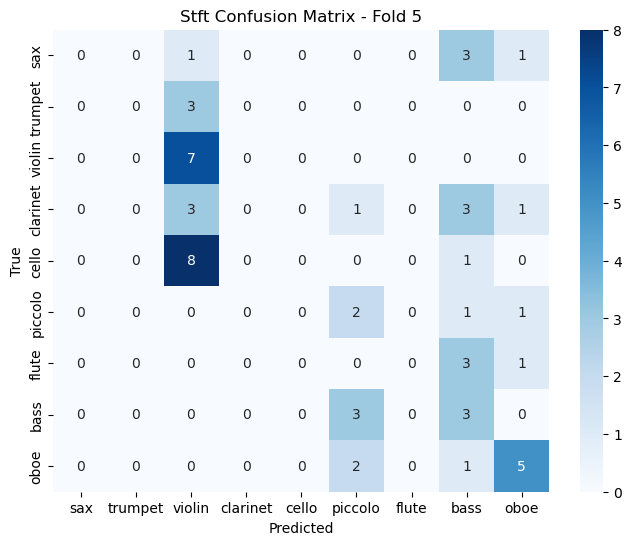


Harmonic Percussive Model
Accuracies: [0.6481481194496155, 0.7962962985038757, 0.7407407164573669, 0.8703703880310059, 0.35185185074806213]
Mean: 0.6815, Std: 0.1801, Min: 0.3519, Max: 0.8704


precision    recall  f1-score    support
sax            1.000000  0.428571  0.600000   7.000000
trumpet        0.555556  0.833333  0.666667   6.000000
violin         0.833333  0.833333  0.833333   6.000000
clarinet       0.750000  0.428571  0.545455   7.000000
cello          0.666667  1.000000  0.800000   6.000000
piccolo        0.500000  1.000000  0.666667   6.000000
flute          1.000000  0.285714  0.444444   7.000000
bass           1.000000  0.800000  0.888889   5.000000
oboe           0.200000  0.250000  0.222222   4.000000
accuracy       0.648148  0.648148  0.648148   0.648148
macro avg      0.722840  0.651058  0.629742  54.000000
weighted avg   0.747840  0.648148  0.634493  54.000000

precision    recall  f1-score    support
sax            1.000000  0.400000  0.571429   5.000000
trumpet        0.857143  0.857143  0.857143   7.000000
violin         0.600000  1.000000  0.750000   6.000000
clarinet       1.000000  0.250000  0.400000   8.000000
cello          0.727273  1.000000  0.842105   8.000000
piccolo        1.000000  1.000000  1.000000   3.000000
flute          0.727273  1.000000  0.842105   8.000000
bass           1.000000  1.000000  1.000000   5.000000
oboe           1.000000  0.750000  0.857143   4.000000
accuracy       0.796296  0.796296  0.796296   0.796296
macro avg      0.879076  0.806349  0.791103  54.000000
weighted avg   0.856229  0.796296  0.767767  54.000000

precision    recall  f1-score    support
sax            0.666667  0.500000  0.571429   4.000000
trumpet        0.666667  1.000000  0.800000   4.000000
violin         0.500000  1.000000  0.666667   5.000000
clarinet       1.000000  0.166667  0.285714   6.000000
cello          0.800000  0.666667  0.727273   6.000000
piccolo        1.000000  1.000000  1.000000   8.000000
flute          1.000000  0.833333  0.909091   6.000000
bass           1.000000  0.571429  0.727273   7.000000
oboe           0.583333  0.875000  0.700000   8.000000
accuracy       0.740741  0.740741  0.740741   0.740741
macro avg      0.801852  0.734788  0.709716  54.000000
weighted avg   0.820370  0.740741  0.723008  54.000000

precision    recall  f1-score   support
sax            1.000000  0.666667  0.800000   9.00000
trumpet        0.769231  1.000000  0.869565  10.00000
violin         1.000000  0.833333  0.909091   6.00000
clarinet       0.250000  1.000000  0.400000   1.00000
cello          0.000000  0.000000  0.000000   1.00000
piccolo        0.900000  1.000000  0.947368   9.00000
flute          1.000000  0.600000  0.750000   5.00000
bass           1.000000  1.000000  1.000000   7.00000
oboe           1.000000  1.000000  1.000000   6.00000
accuracy       0.870370  0.870370  0.870370   0.87037
macro avg      0.768803  0.788889  0.741781  54.00000
weighted avg   0.908191  0.870370  0.870861  54.00000

precision    recall  f1-score    support
sax            0.000000  0.000000  0.000000   5.000000
trumpet        0.000000  0.000000  0.000000   3.000000
violin         0.777778  1.000000  0.875000   7.000000
clarinet       1.000000  0.125000  0.222222   8.000000
cello          0.000000  0.000000  0.000000   9.000000
piccolo        0.190476  1.000000  0.320000   4.000000
flute          0.200000  1.000000  0.333333   4.000000
bass           1.000000  0.500000  0.666667   6.000000
oboe           0.000000  0.000000  0.000000   8.000000
accuracy       0.351852  0.351852  0.351852   0.351852
macro avg      0.352028  0.402778  0.268580  54.000000
weighted avg   0.389006  0.351852  0.268817  54.000000

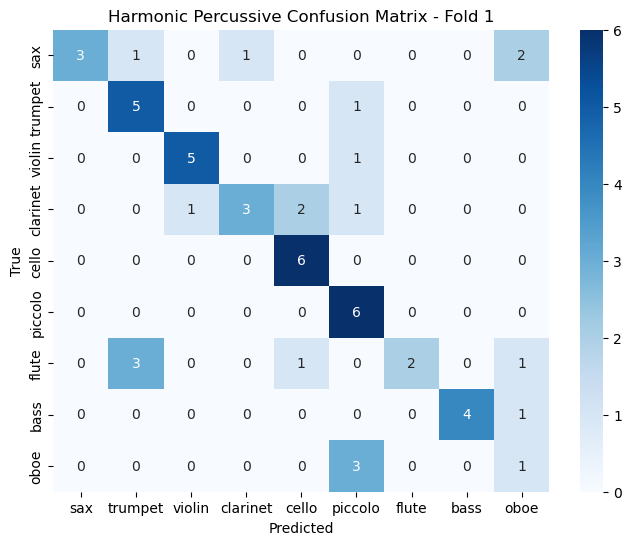

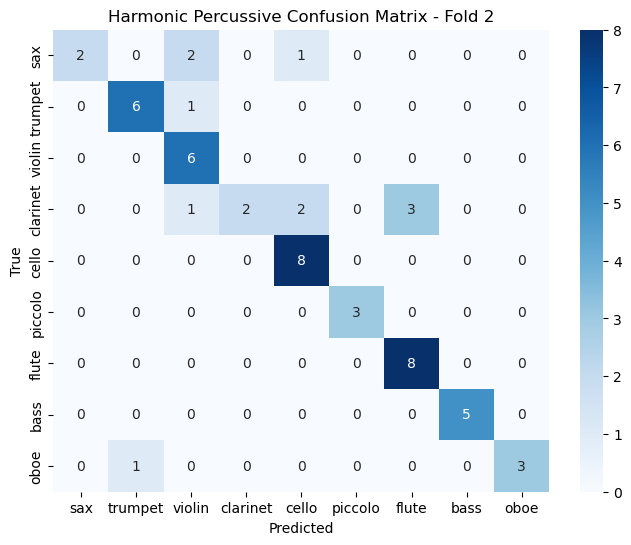

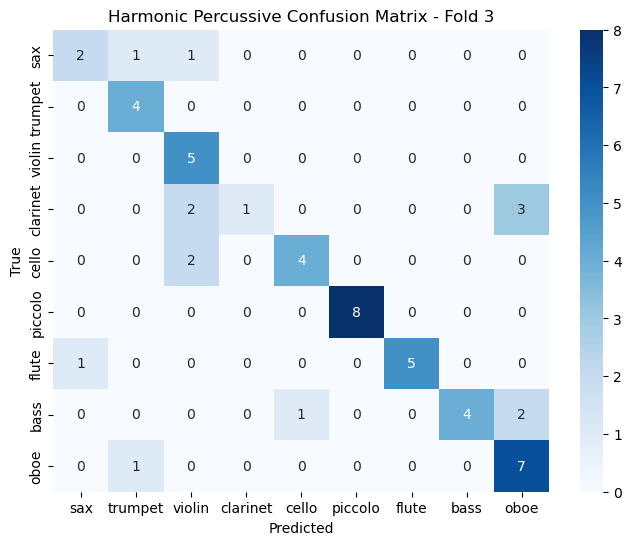

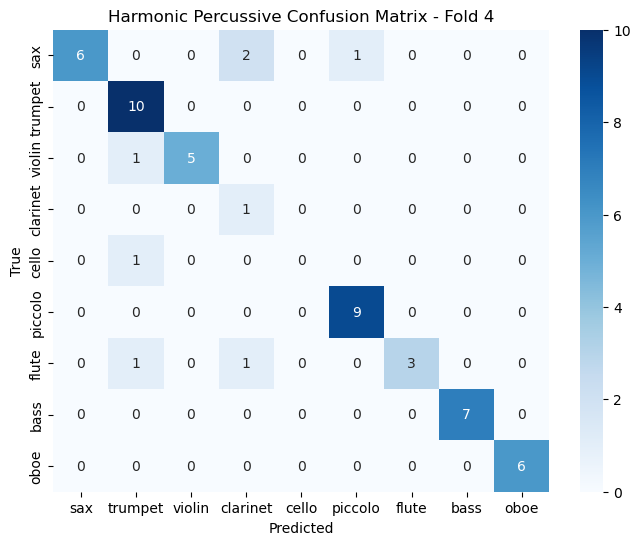

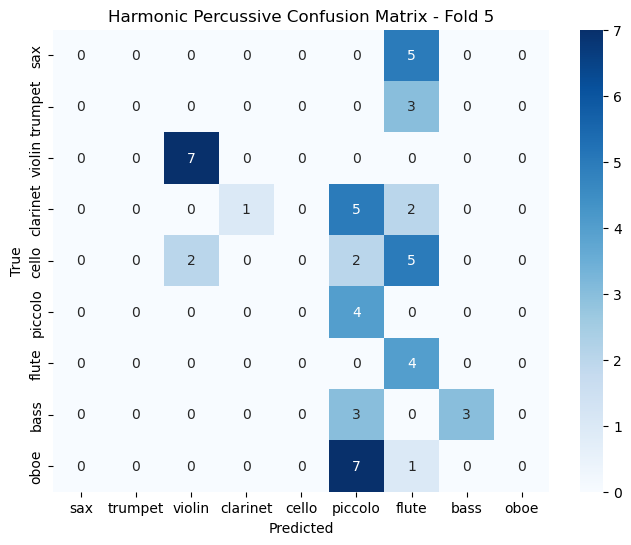


Onset Strength Model
Accuracies: [0.1111111119389534, 0.1111111119389534, 0.18518517911434174, 0.03703703731298447, 0.07407407462596893]
Mean: 0.1037, Std: 0.0491, Min: 0.0370, Max: 0.1852


precision    recall  f1-score    support
sax            0.000000  0.000000  0.000000   7.000000
trumpet        0.000000  0.000000  0.000000   6.000000
violin         0.000000  0.000000  0.000000   6.000000
clarinet       0.139535  0.857143  0.240000   7.000000
cello          0.000000  0.000000  0.000000   6.000000
piccolo        0.000000  0.000000  0.000000   6.000000
flute          0.000000  0.000000  0.000000   7.000000
bass           0.000000  0.000000  0.000000   5.000000
oboe           0.000000  0.000000  0.000000   4.000000
accuracy       0.111111  0.111111  0.111111   0.111111
macro avg      0.015504  0.095238  0.026667  54.000000
weighted avg   0.018088  0.111111  0.031111  54.000000

precision    recall  f1-score    support
sax            0.000000  0.000000  0.000000   5.000000
trumpet        0.000000  0.000000  0.000000   7.000000
violin         0.000000  0.000000  0.000000   6.000000
clarinet       0.125000  0.750000  0.214286   8.000000
cello          0.000000  0.000000  0.000000   8.000000
piccolo        0.000000  0.000000  0.000000   3.000000
flute          0.000000  0.000000  0.000000   8.000000
bass           0.000000  0.000000  0.000000   5.000000
oboe           0.000000  0.000000  0.000000   4.000000
accuracy       0.111111  0.111111  0.111111   0.111111
macro avg      0.013889  0.083333  0.023810  54.000000
weighted avg   0.018519  0.111111  0.031746  54.000000

precision    recall  f1-score    support
sax            0.176471  0.750000  0.285714   4.000000
trumpet        0.000000  0.000000  0.000000   4.000000
violin         0.000000  0.000000  0.000000   5.000000
clarinet       0.142857  0.500000  0.222222   6.000000
cello          0.000000  0.000000  0.000000   6.000000
piccolo        0.222222  0.250000  0.235294   8.000000
flute          0.000000  0.000000  0.000000   6.000000
bass           1.000000  0.285714  0.444444   7.000000
oboe           0.000000  0.000000  0.000000   8.000000
accuracy       0.185185  0.185185  0.185185   0.185185
macro avg      0.171283  0.198413  0.131964  54.000000
weighted avg   0.191496  0.185185  0.138327  54.000000

precision    recall  f1-score    support
sax            0.142857  0.222222  0.173913   9.000000
trumpet        0.000000  0.000000  0.000000  10.000000
violin         0.000000  0.000000  0.000000   6.000000
clarinet       0.000000  0.000000  0.000000   1.000000
cello          0.000000  0.000000  0.000000   1.000000
piccolo        0.000000  0.000000  0.000000   9.000000
flute          0.000000  0.000000  0.000000   5.000000
bass           0.000000  0.000000  0.000000   7.000000
oboe           0.000000  0.000000  0.000000   6.000000
accuracy       0.037037  0.037037  0.037037   0.037037
macro avg      0.015873  0.024691  0.019324  54.000000
weighted avg   0.023810  0.037037  0.028986  54.000000

precision    recall  f1-score    support
sax            0.000000  0.000000  0.000000   5.000000
trumpet        0.000000  0.000000  0.000000   3.000000
violin         1.000000  0.142857  0.250000   7.000000
clarinet       0.100000  0.125000  0.111111   8.000000
cello          0.125000  0.111111  0.117647   9.000000
piccolo        0.142857  0.250000  0.181818   4.000000
flute          0.000000  0.000000  0.000000   4.000000
bass           0.000000  0.000000  0.000000   6.000000
oboe           0.000000  0.000000  0.000000   8.000000
accuracy       0.074074  0.074074  0.074074   0.074074
macro avg      0.151984  0.069885  0.073397  54.000000
weighted avg   0.175860  0.074074  0.081944  54.000000

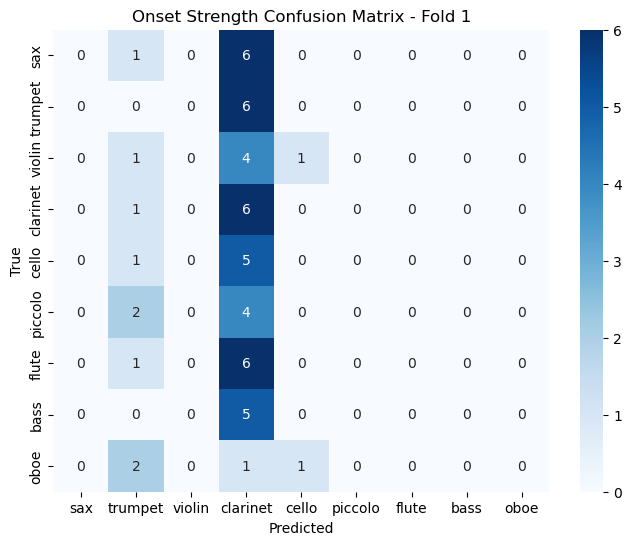

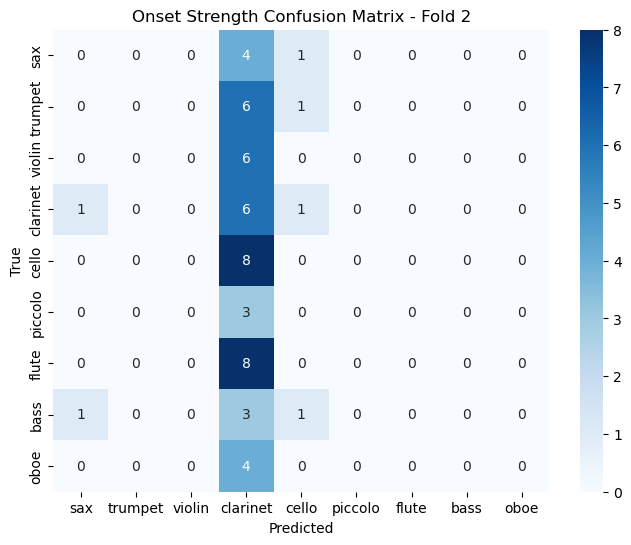

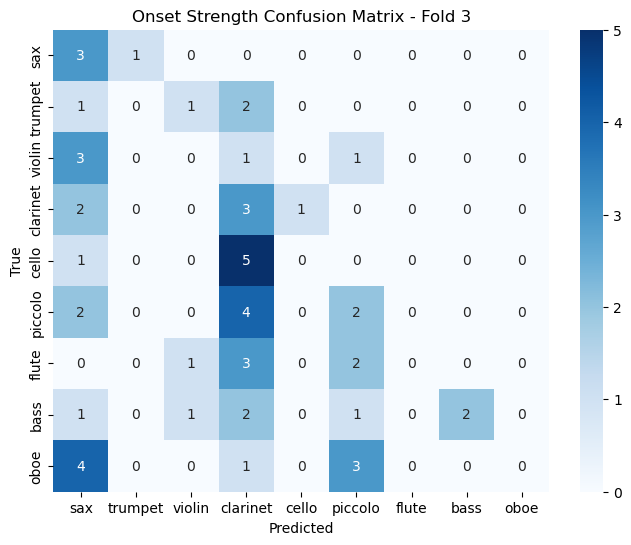

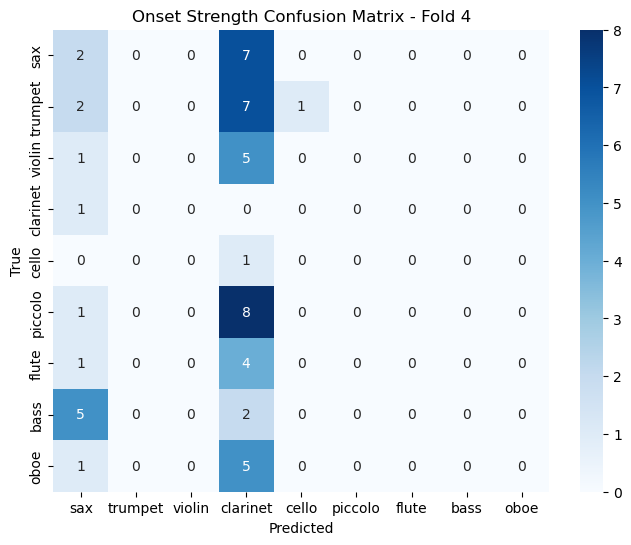

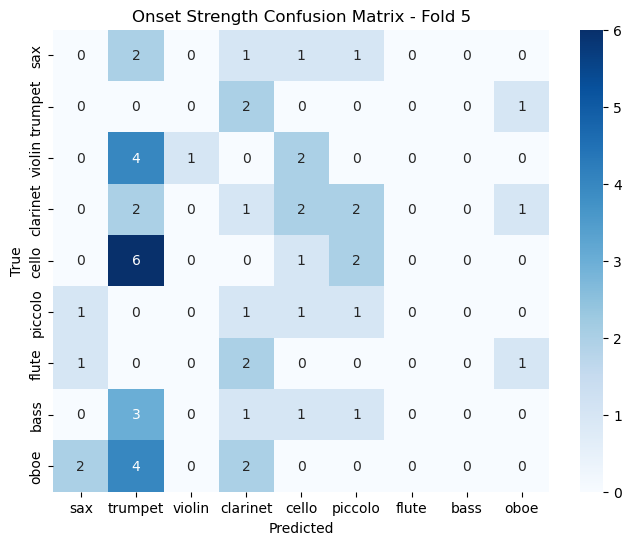

In [9]:
# Show detailed results for each feature type
for feature_type, results in individual_results.items():
    print(f"\n{'='*40}")
    print(f"{feature_type.replace('_', ' ').title()} Model")
    print(f"{'='*40}")
    accs = results['accuracy_list']
    print(f"Accuracies: {accs}")
    print(f"Mean: {np.mean(accs):.4f}, Std: {np.std(accs):.4f}, Min: {np.min(accs):.4f}, Max: {np.max(accs):.4f}")

    # Classification reports
    for i, report in enumerate(results['classification_reports']):
        df = pd.DataFrame(report).transpose()
        df.index = [class_names[int(idx)] if idx.isdigit() and int(idx) < len(class_names) else idx for idx in df.index]
        display(df)

    # Confusion matrices
    for i, conf_matrix in enumerate(results['confusion_matrices']):
        plt.figure(figsize=(8, 6))
        sns.heatmap(np.array(conf_matrix), annot=True, fmt="d", cmap="Blues",
                    xticklabels=class_names, yticklabels=class_names)
        plt.title(f"{feature_type.replace('_', ' ').title()} Confusion Matrix - Fold {i+1}")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()

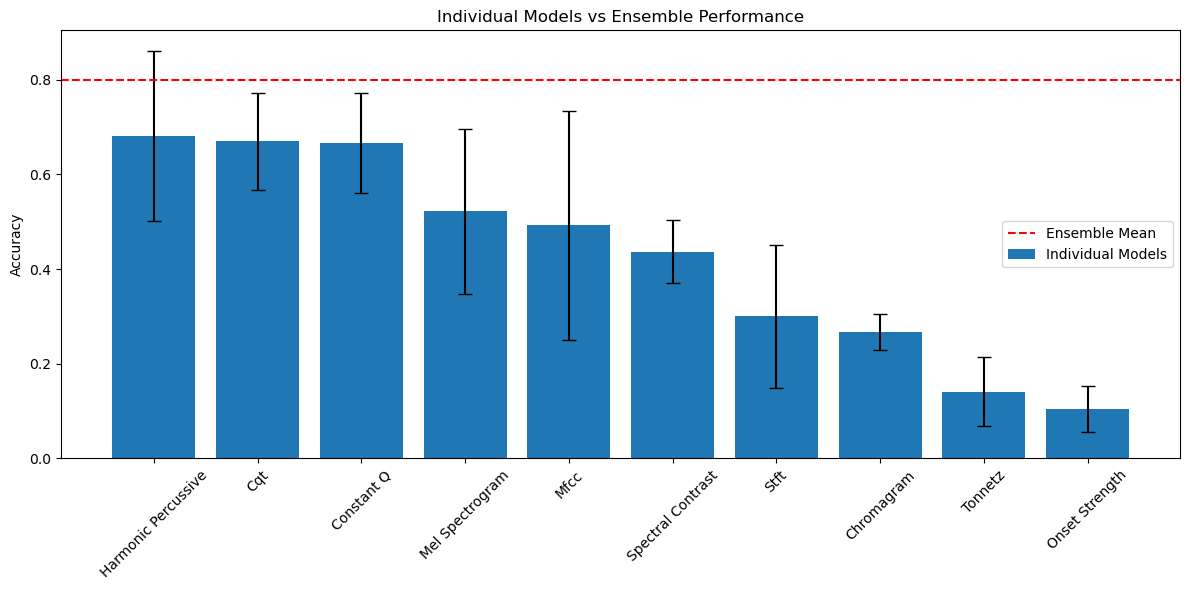

In [10]:
# Visual comparison of individual vs ensemble performance
plt.figure(figsize=(12, 6))
plt.bar(performance_df['Feature Type'], performance_df['Mean Accuracy'], yerr=performance_df['Std Accuracy'], capsize=5, label='Individual Models')
plt.axhline(np.mean(ensemble_results['accuracy_list']), color='red', linestyle='--', label='Ensemble Mean')
plt.ylabel('Accuracy')
plt.title('Individual Models vs Ensemble Performance')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Mel Spectrogram Training History


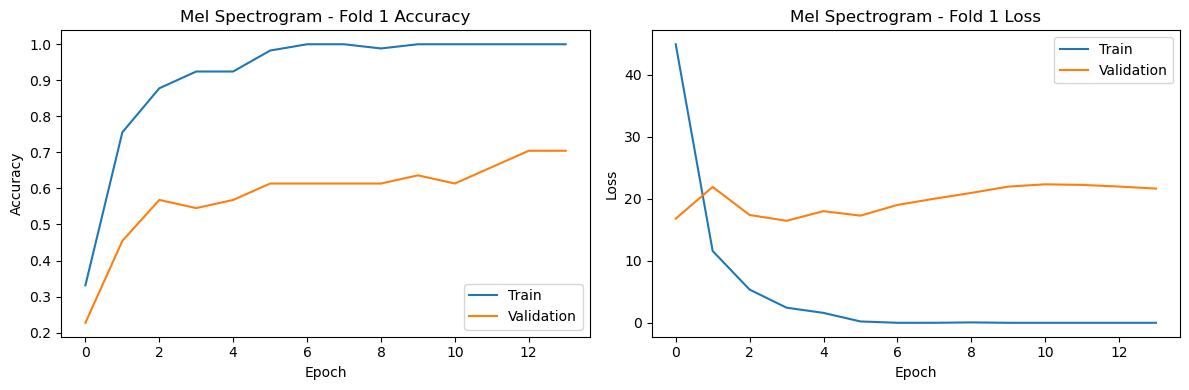

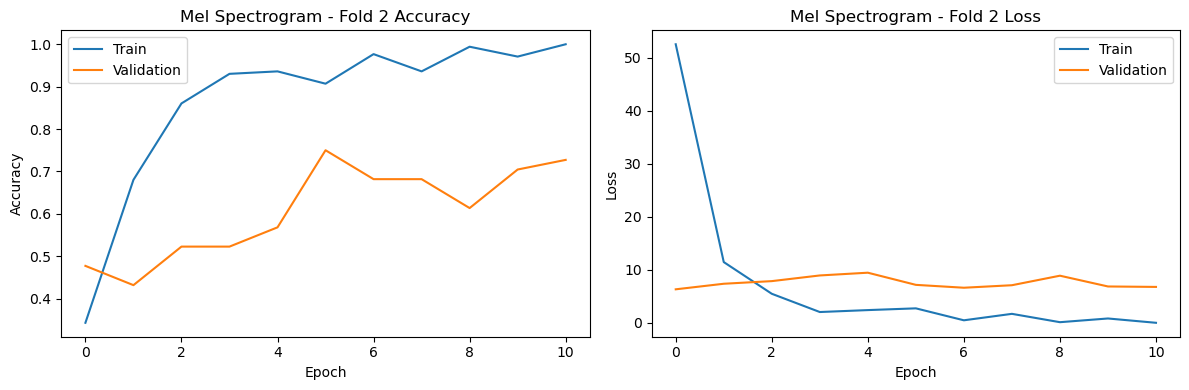

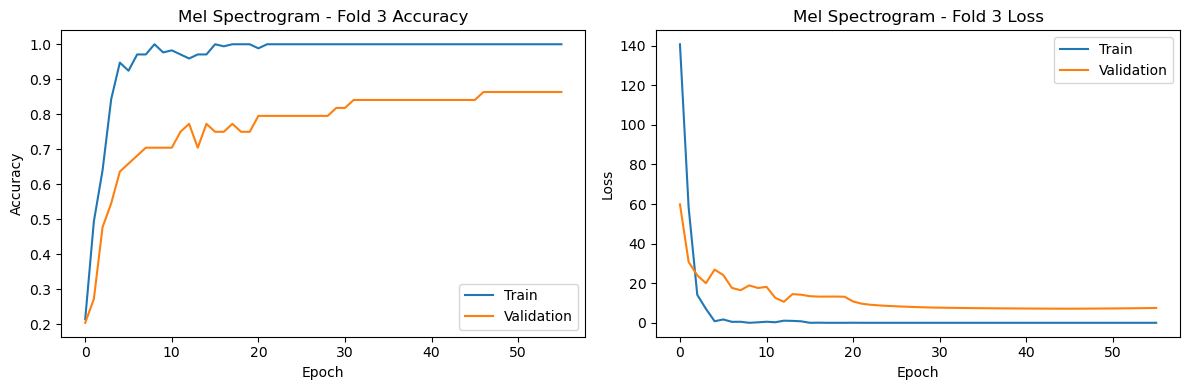

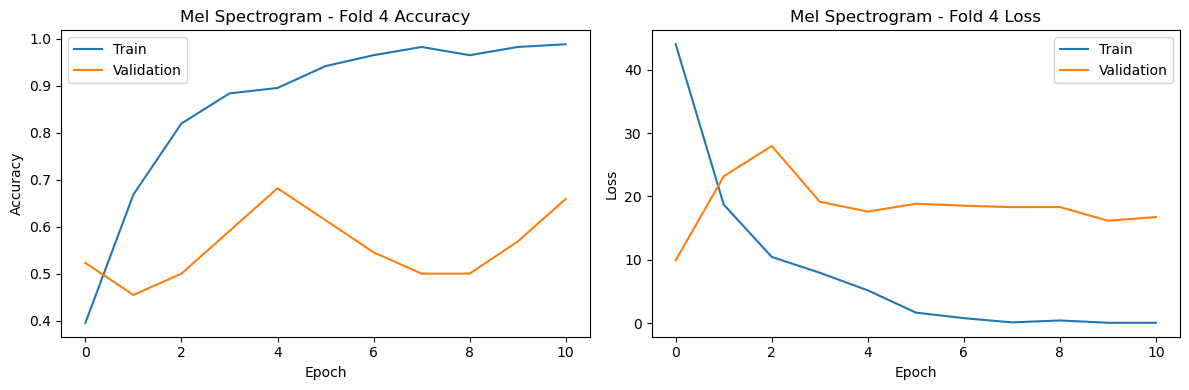

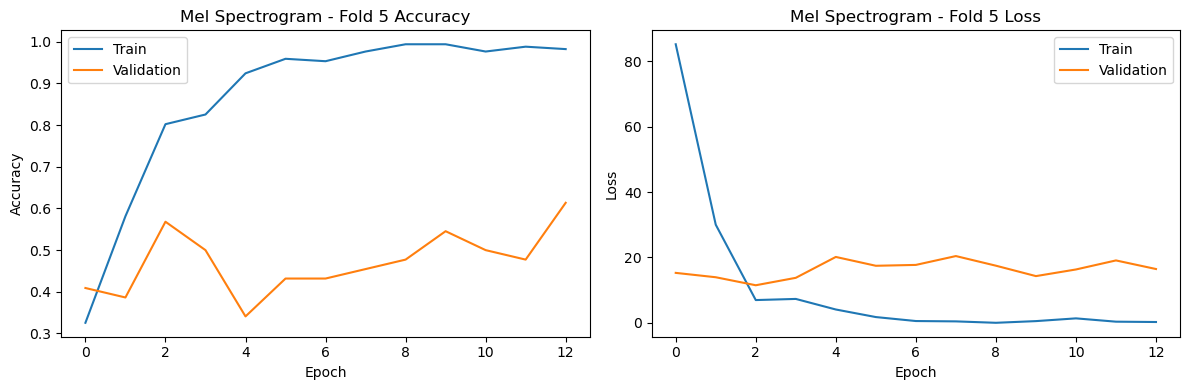


Mfcc Training History


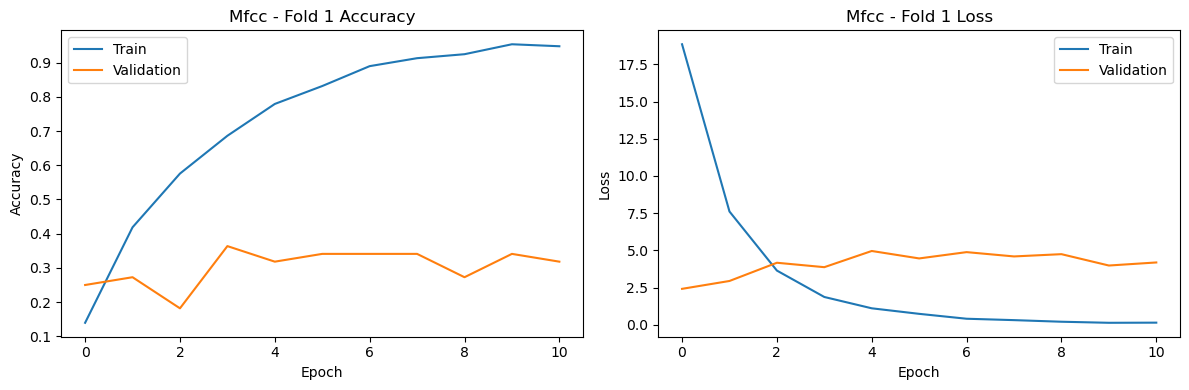

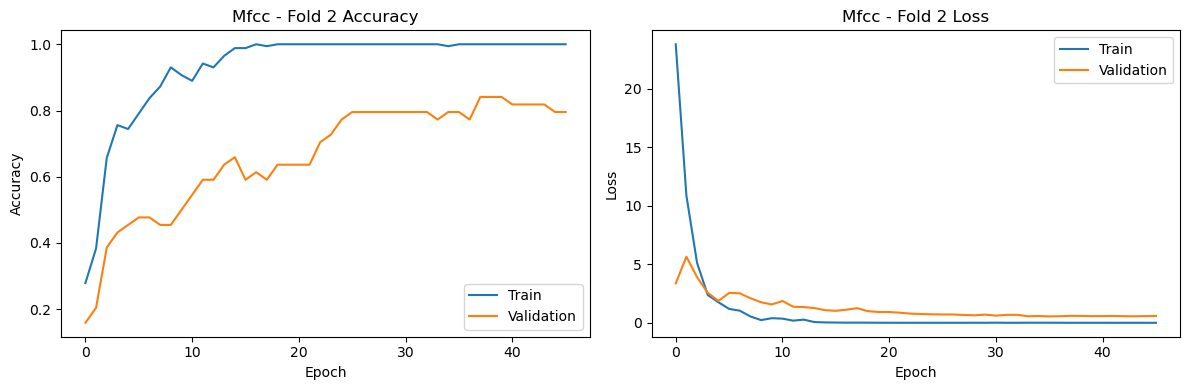

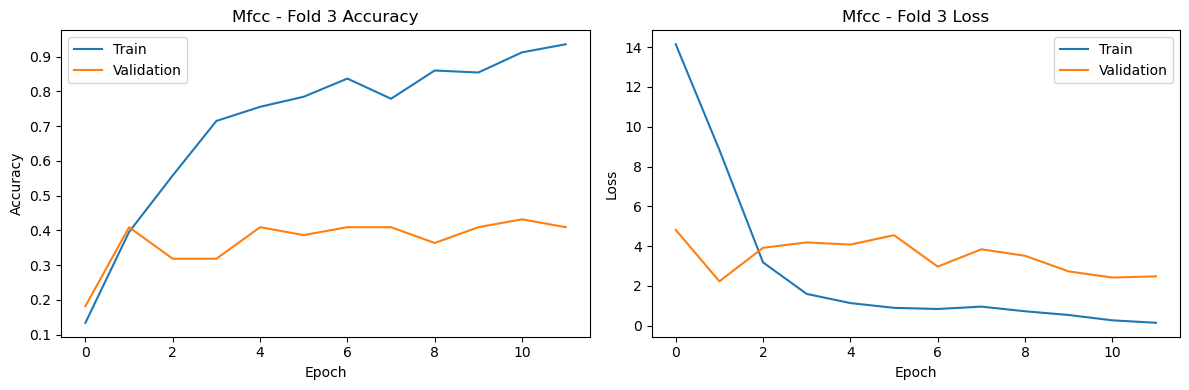

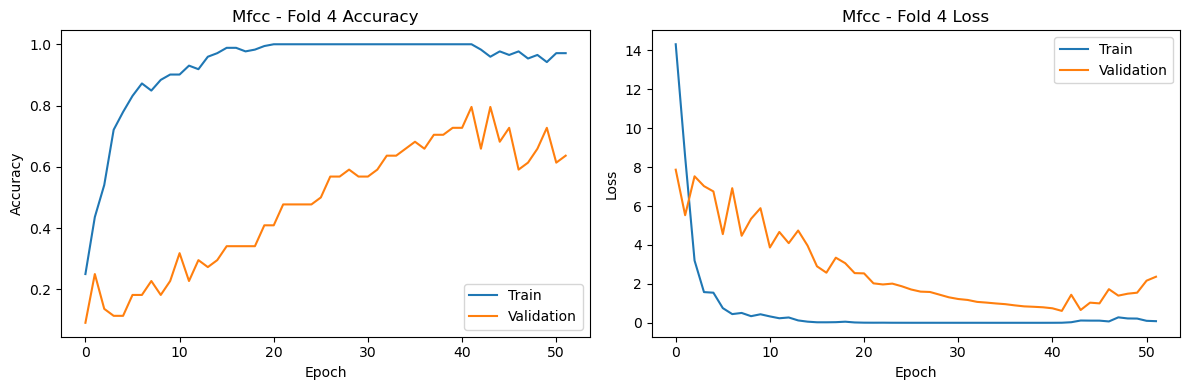

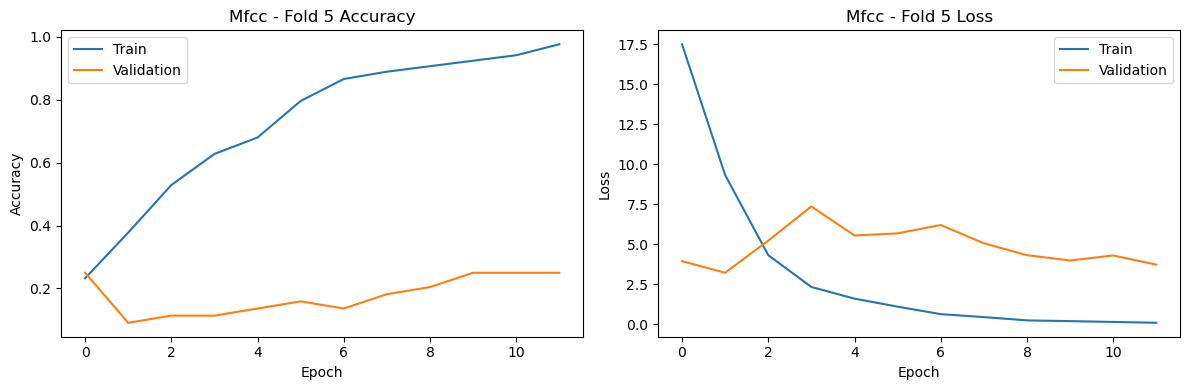


Chromagram Training History


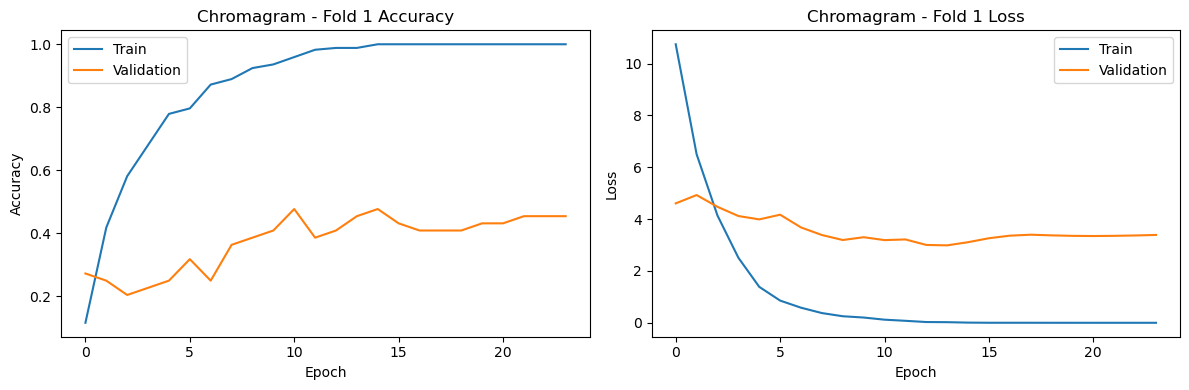

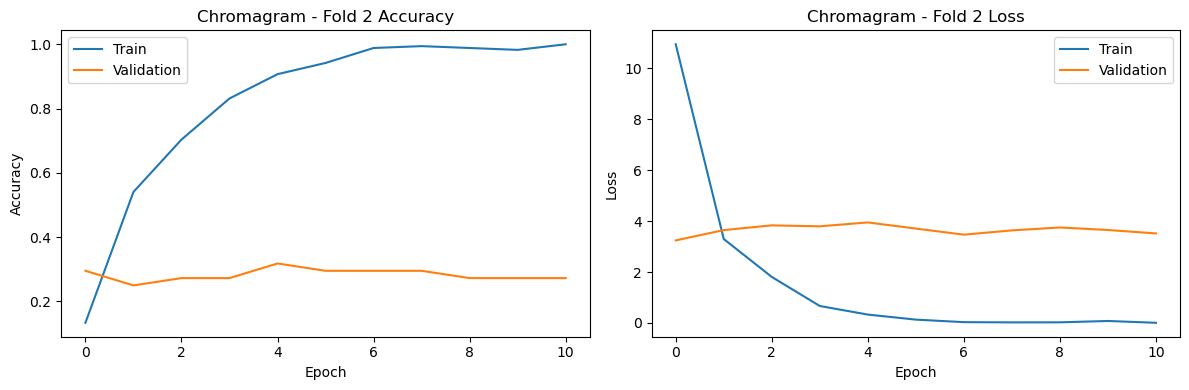

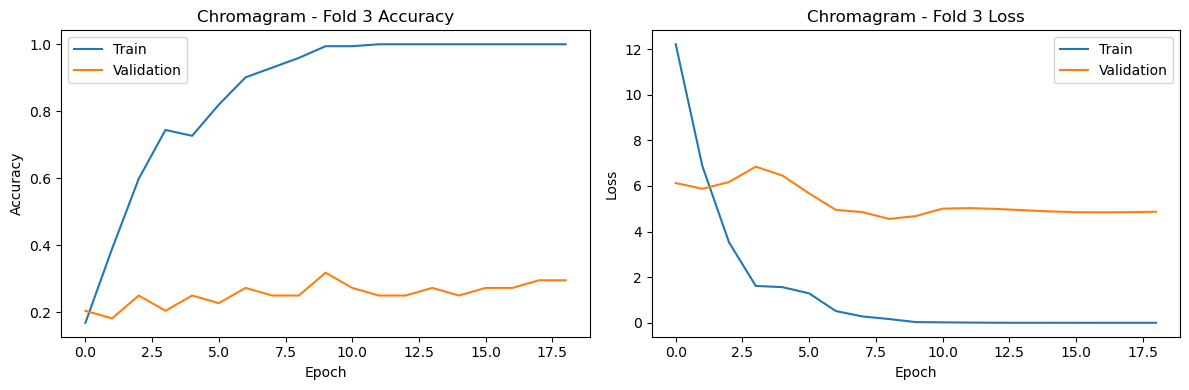

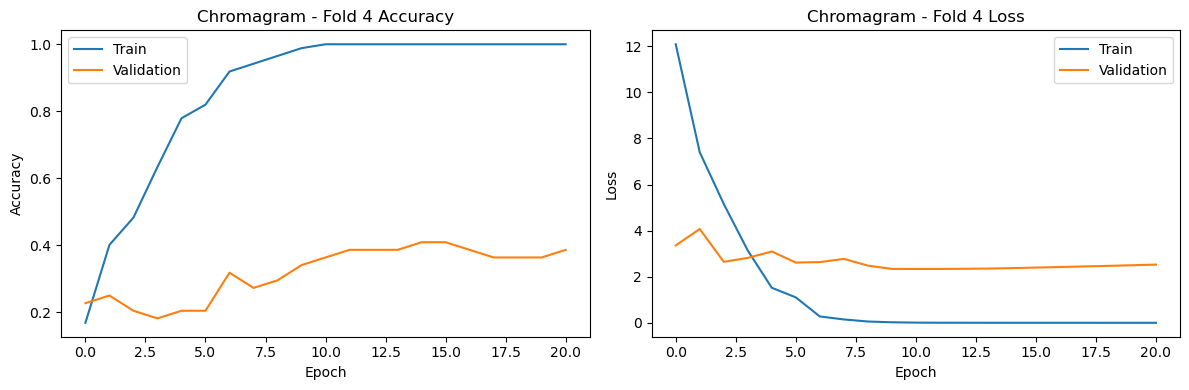

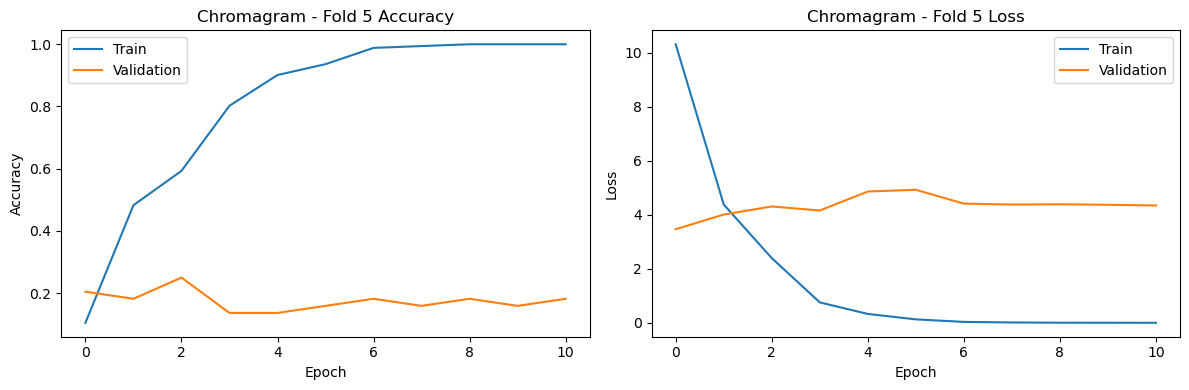


Spectral Contrast Training History


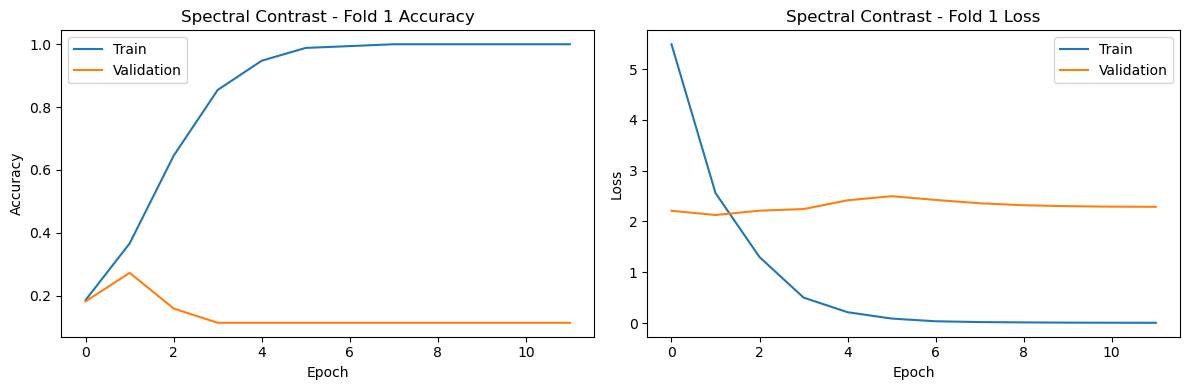

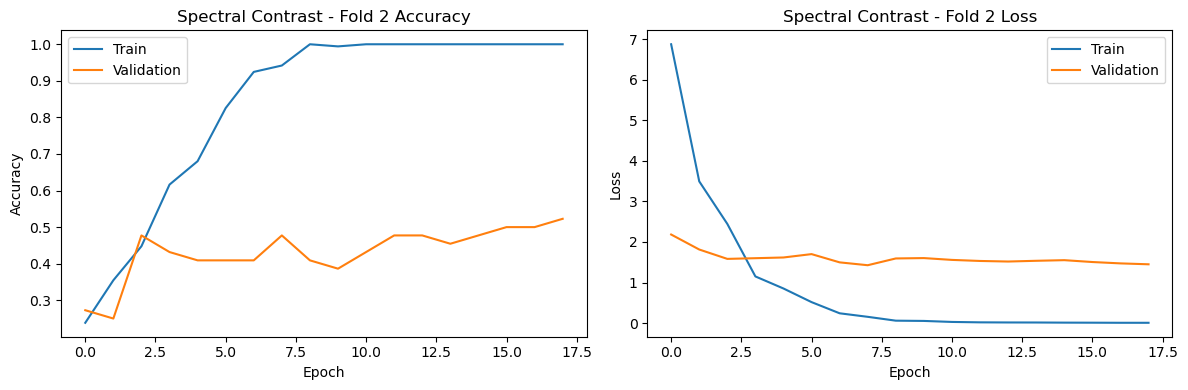

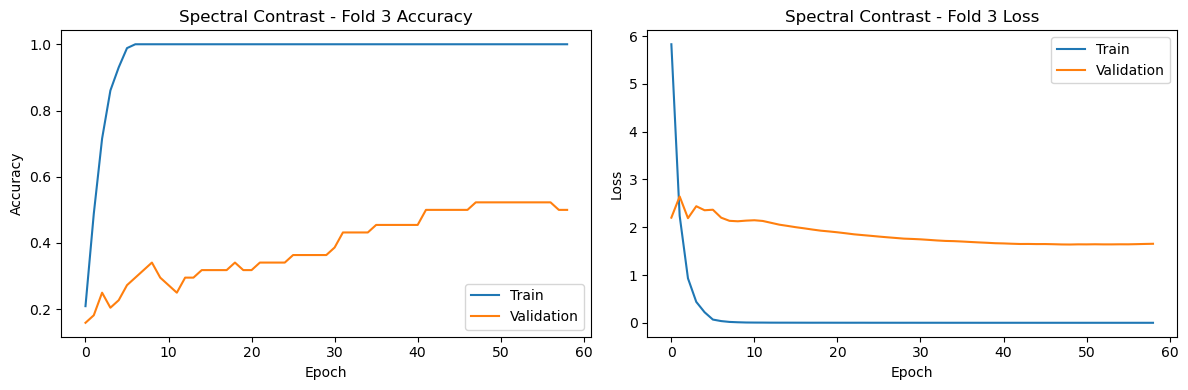

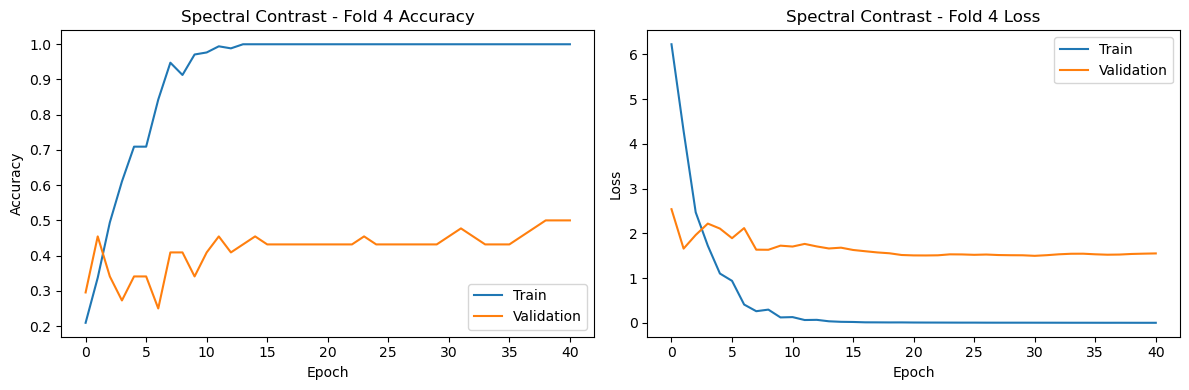

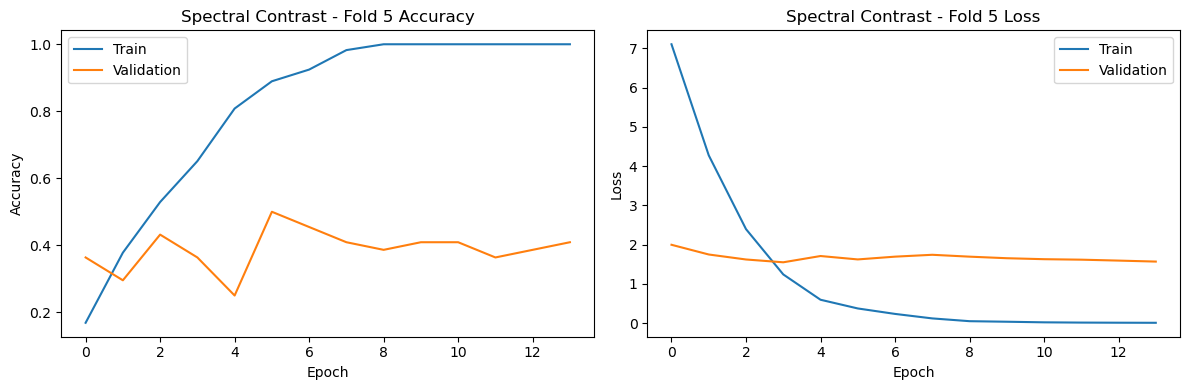


Tonnetz Training History


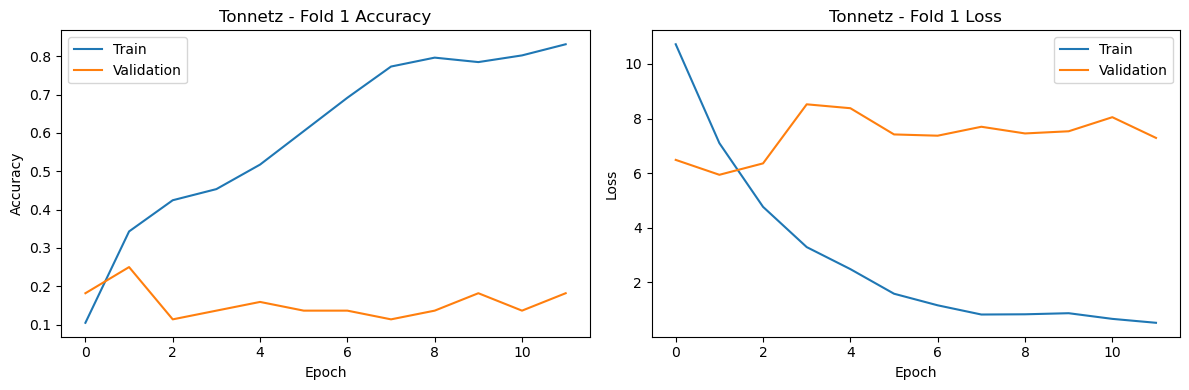

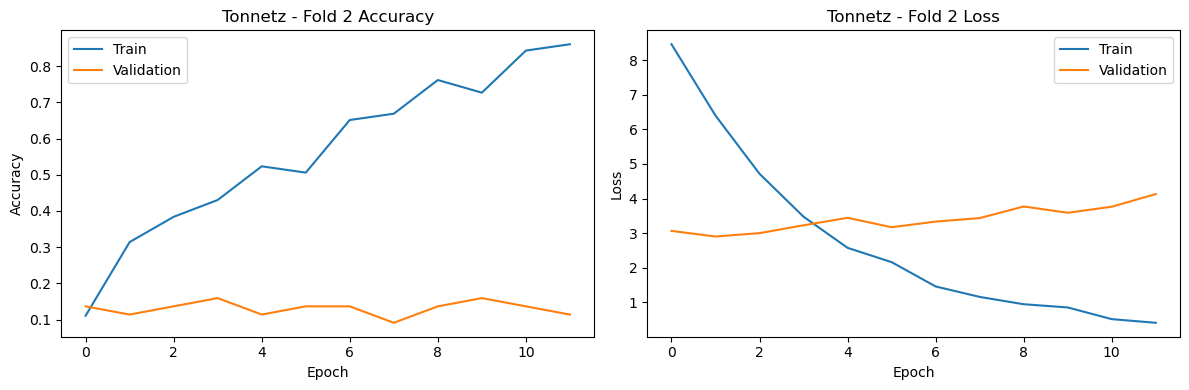

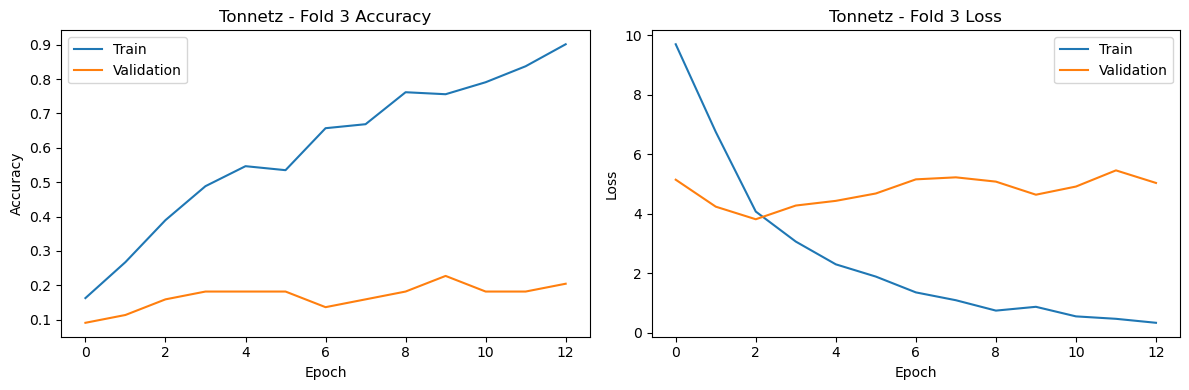

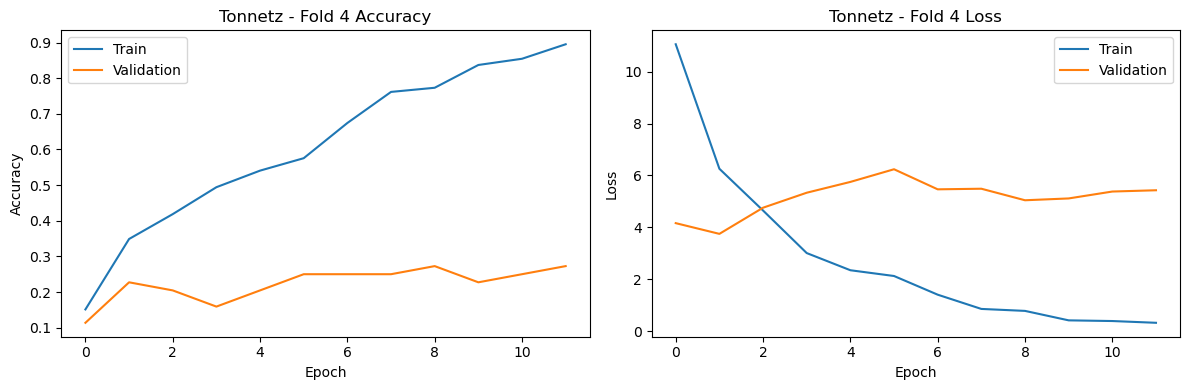

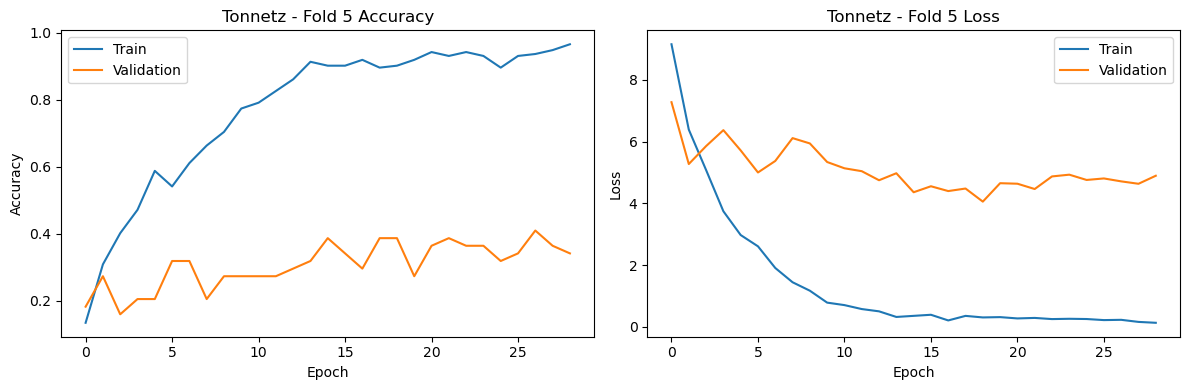


Constant Q Training History


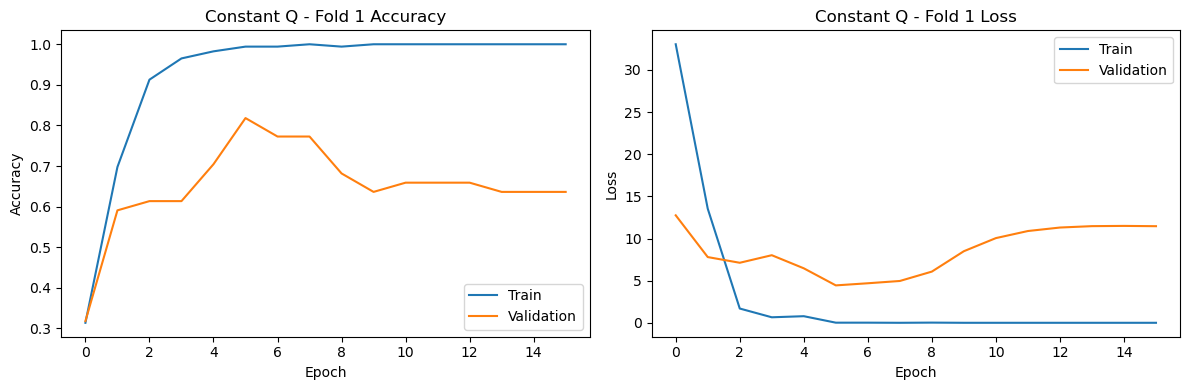

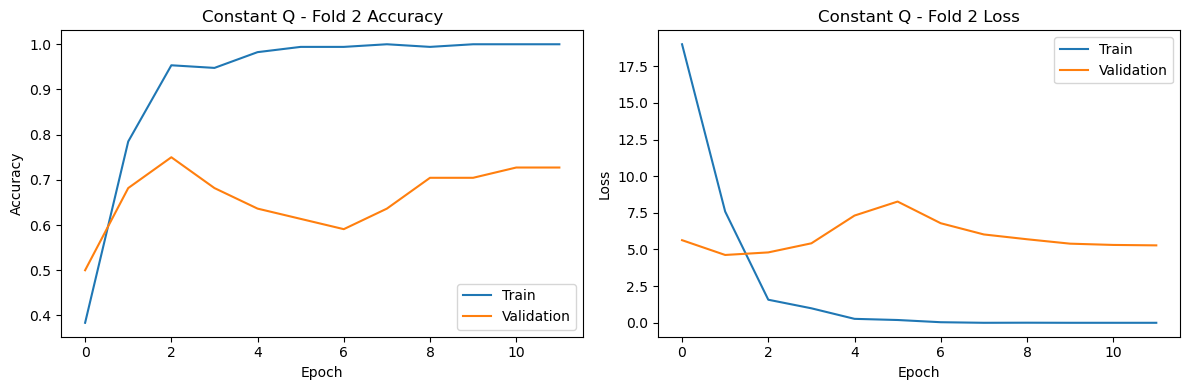

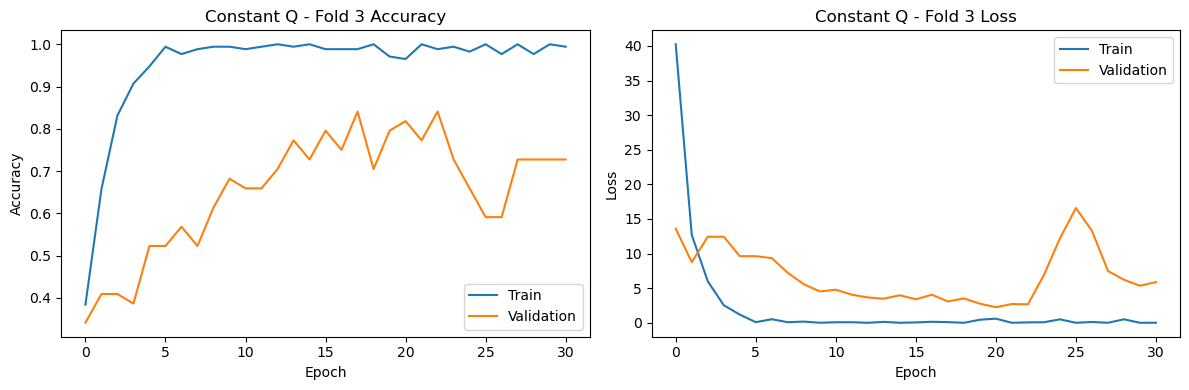

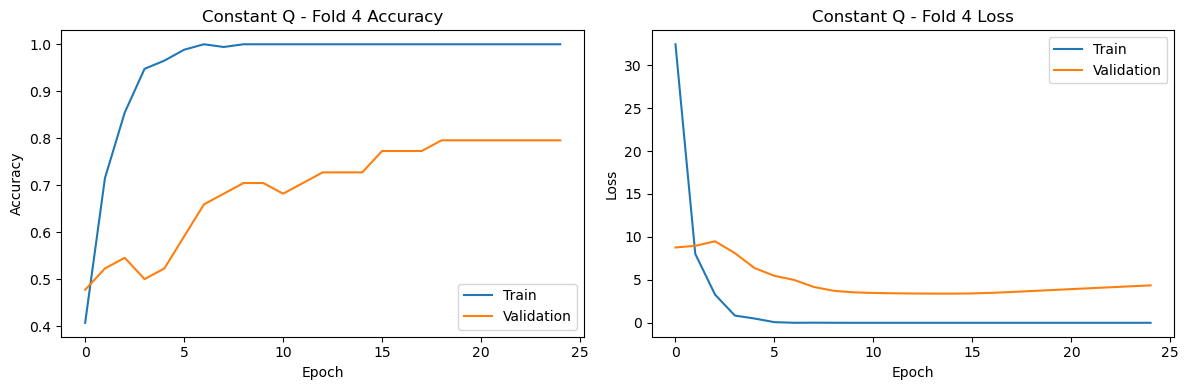

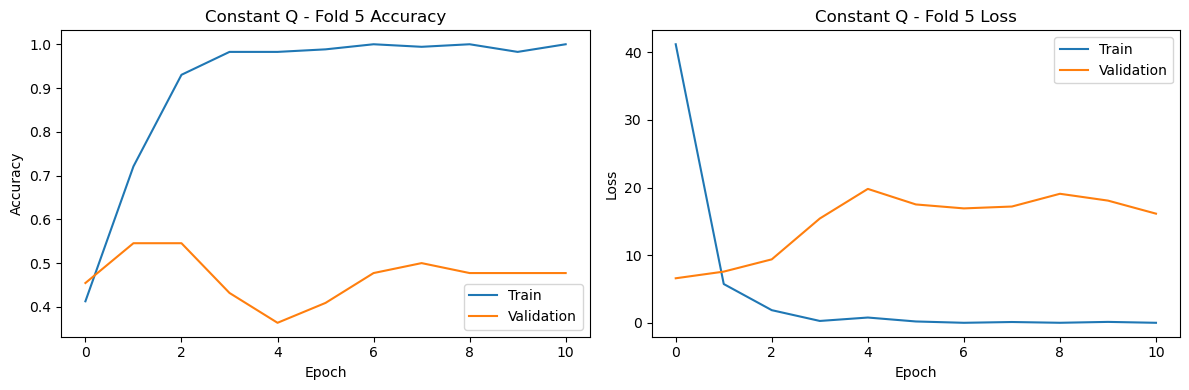


Cqt Training History


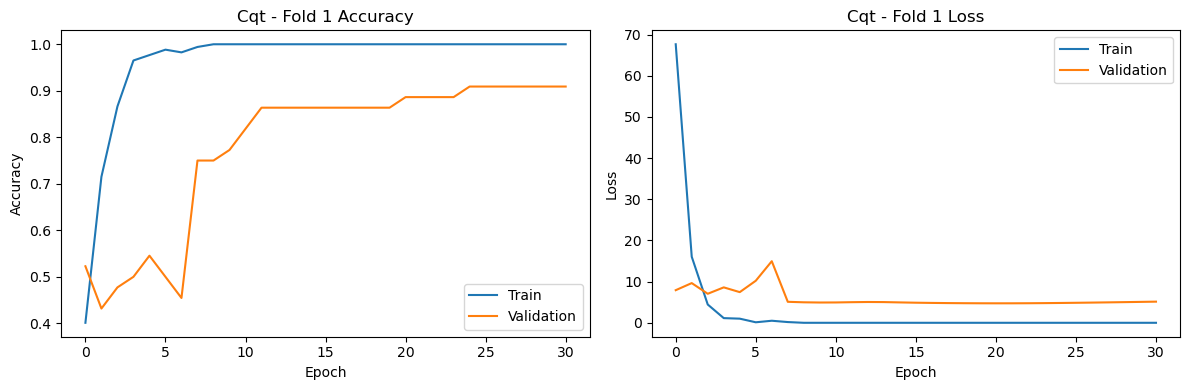

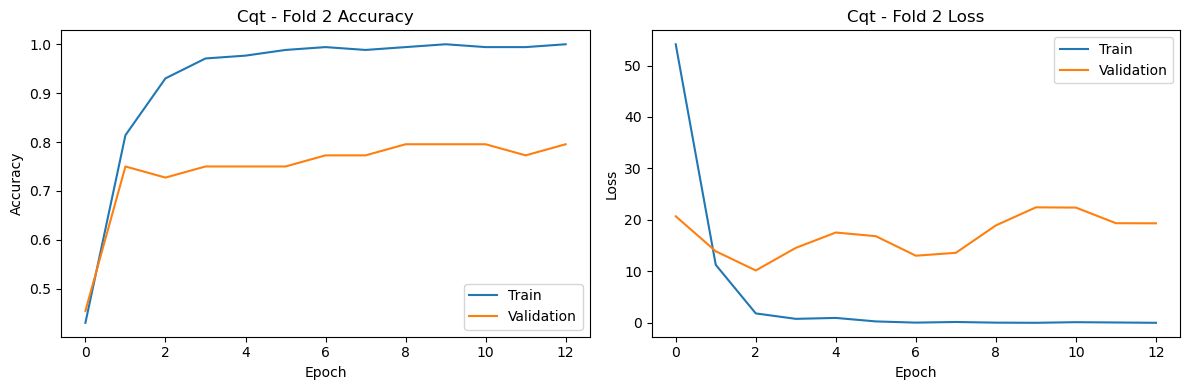

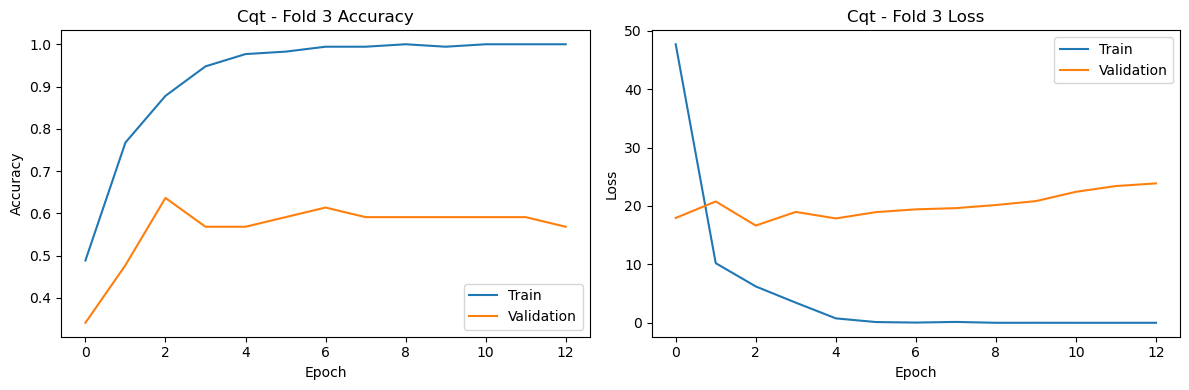

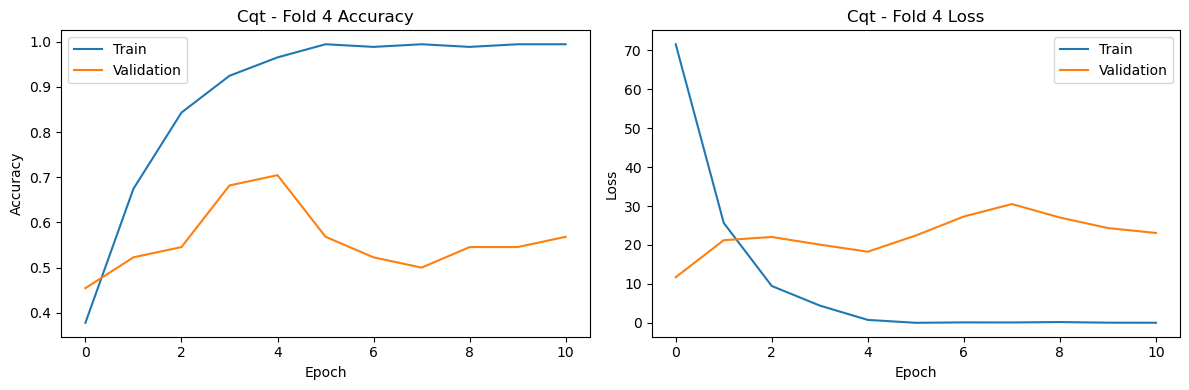

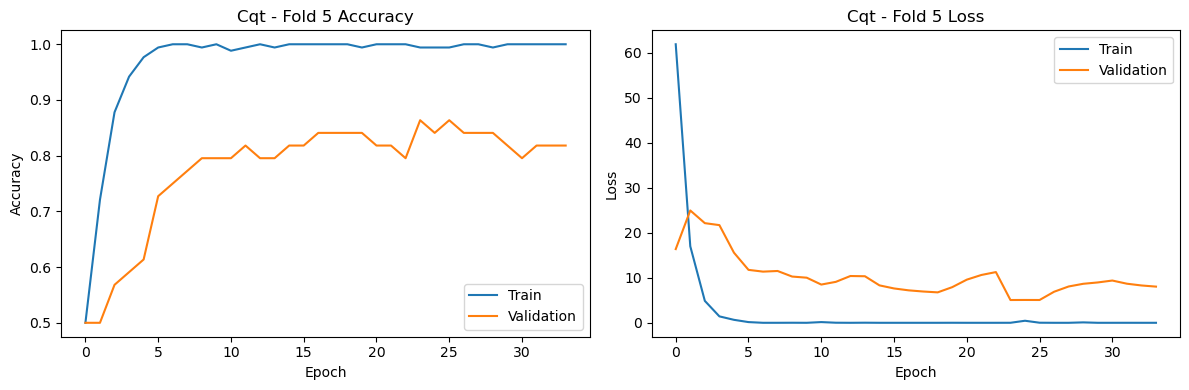


Stft Training History


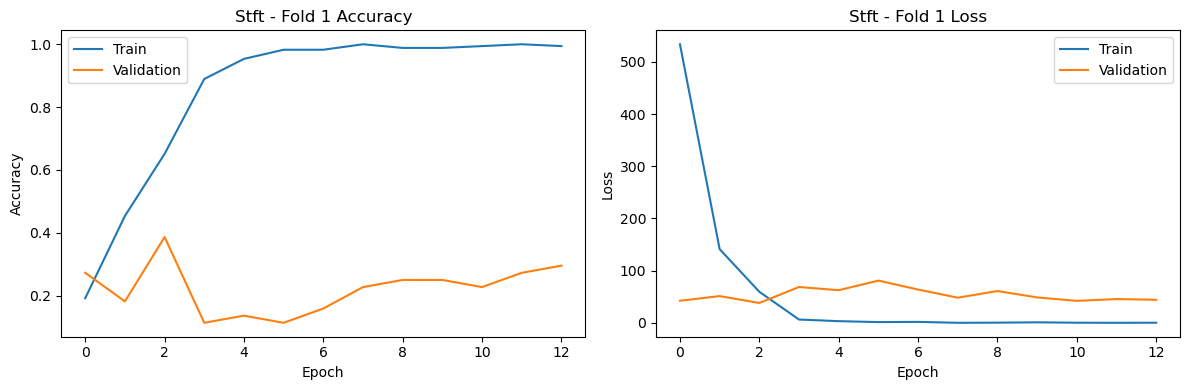

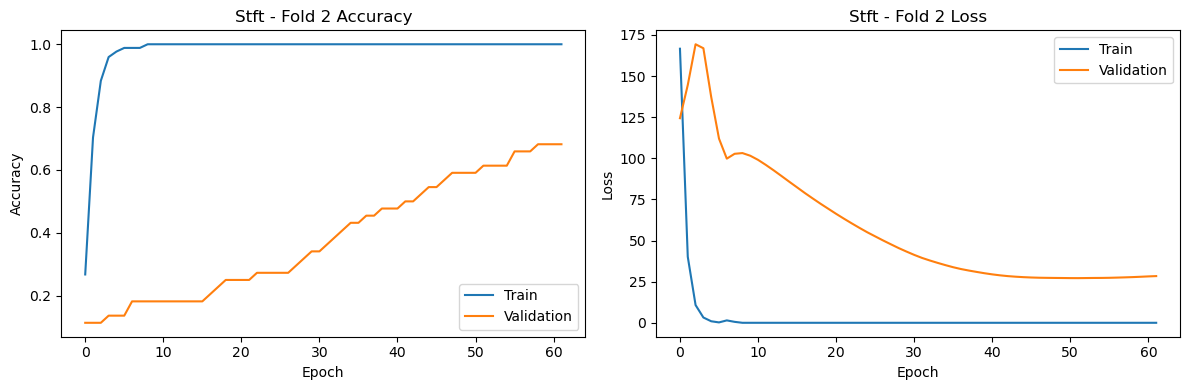

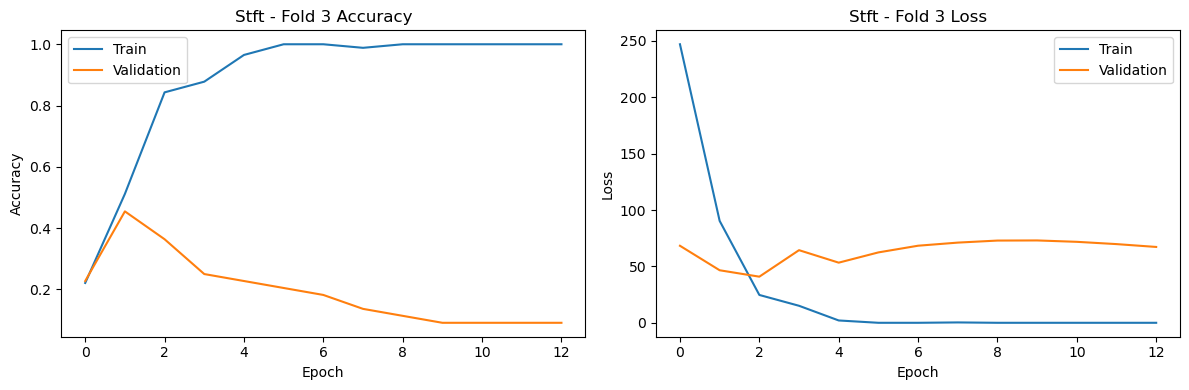

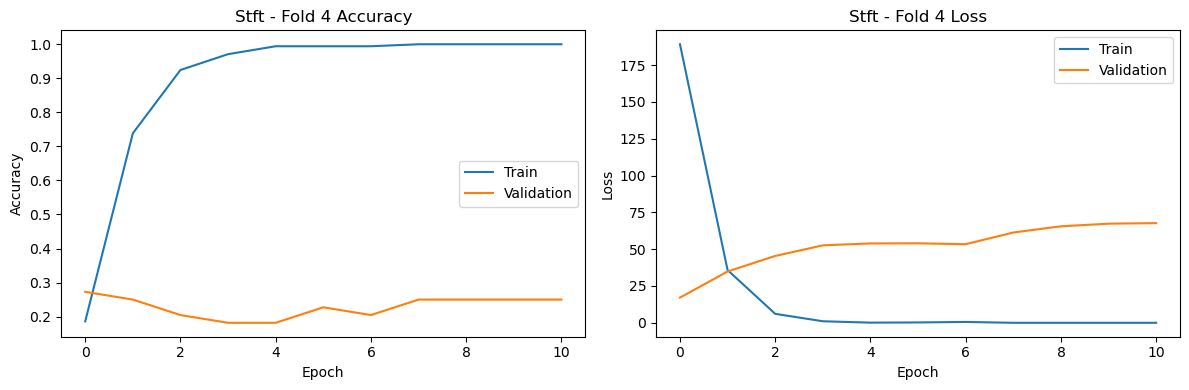

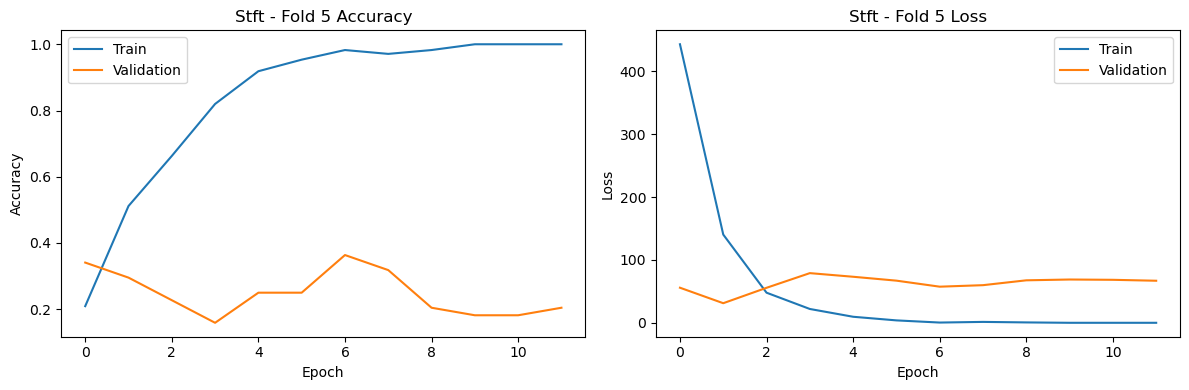


Harmonic Percussive Training History


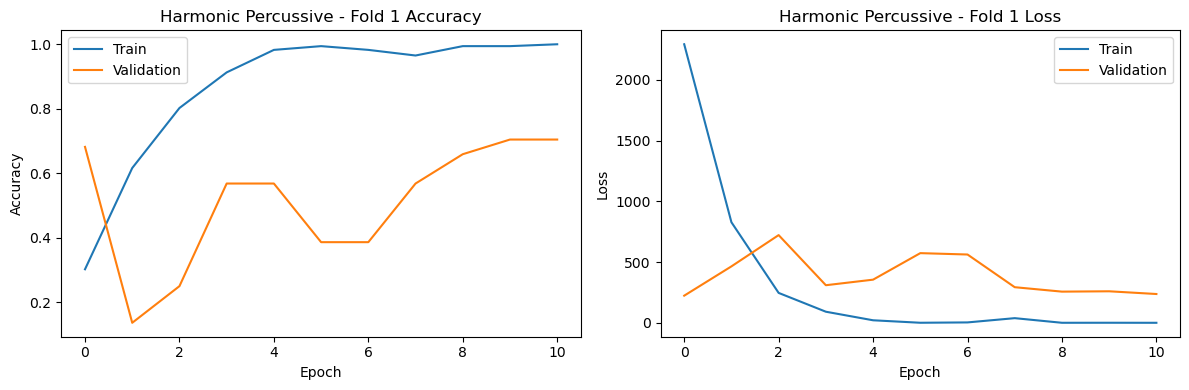

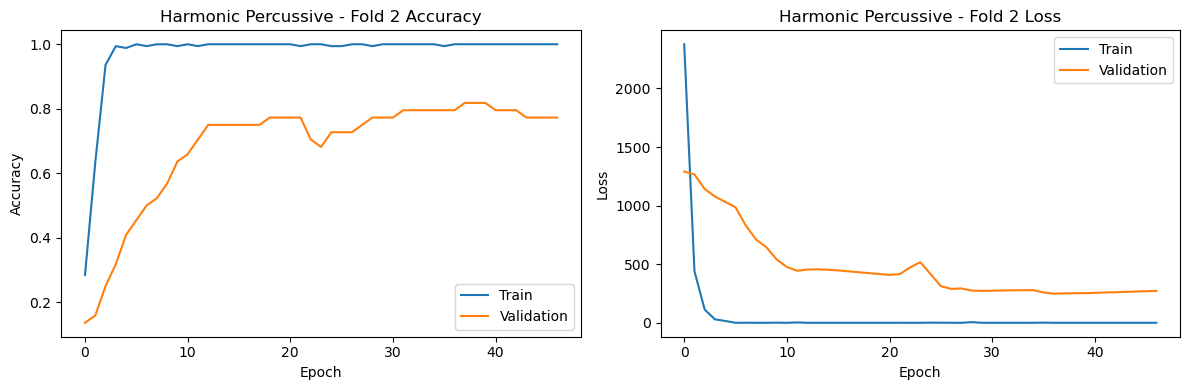

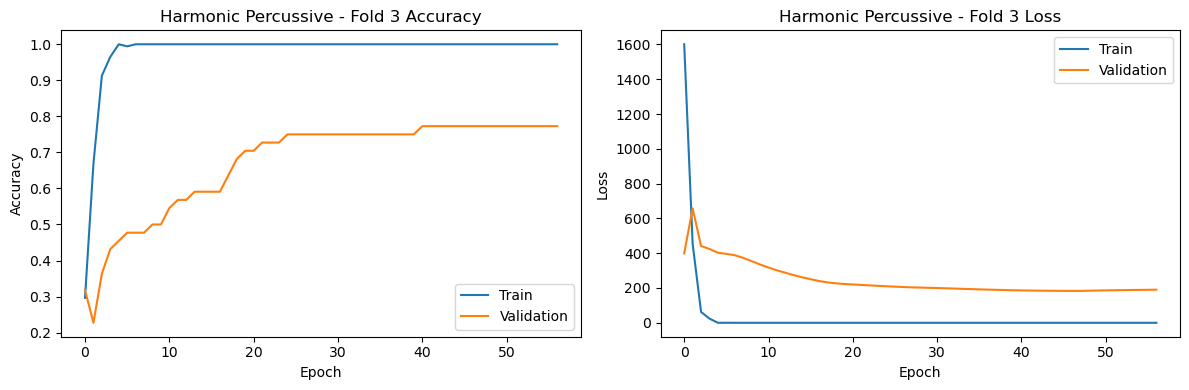

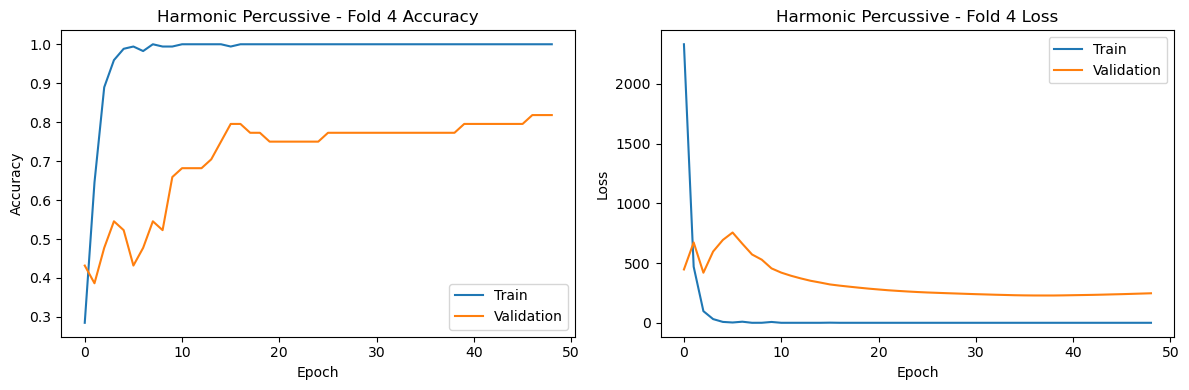

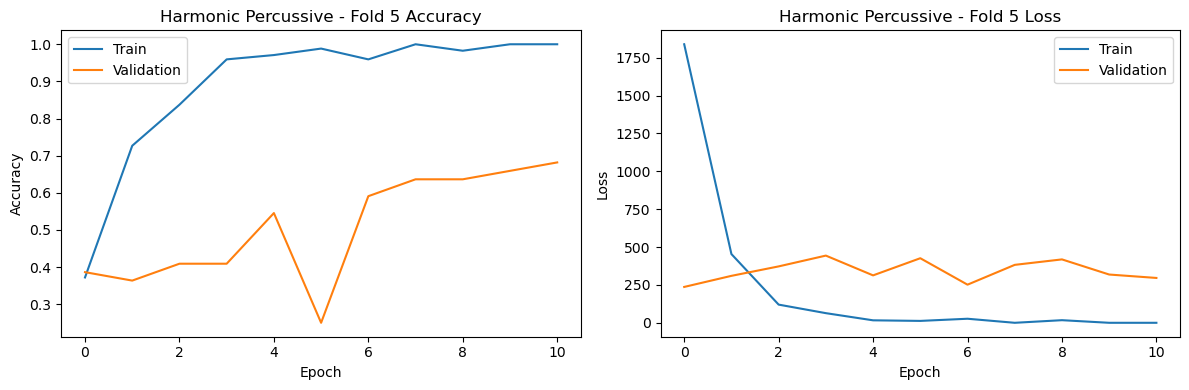


Onset Strength Training History


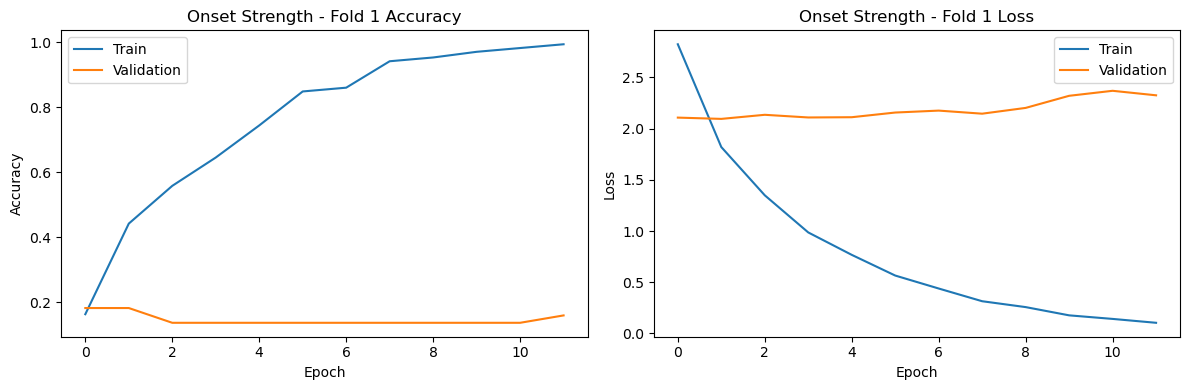

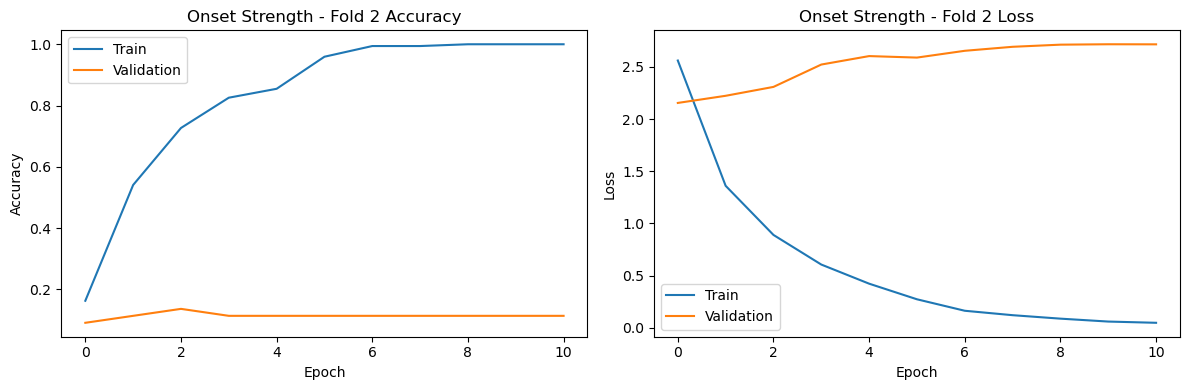

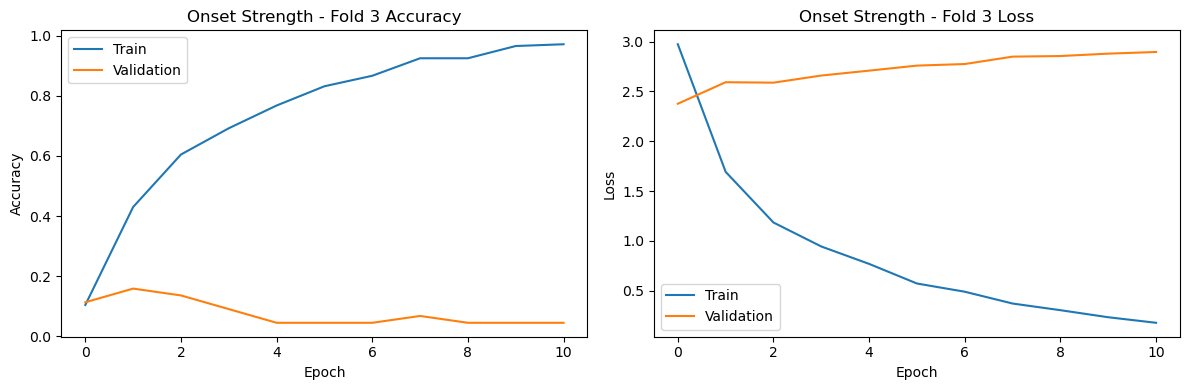

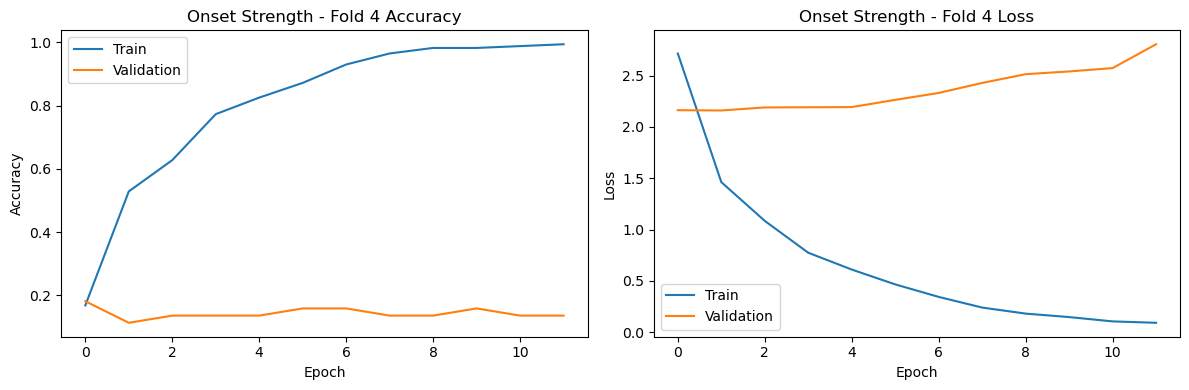

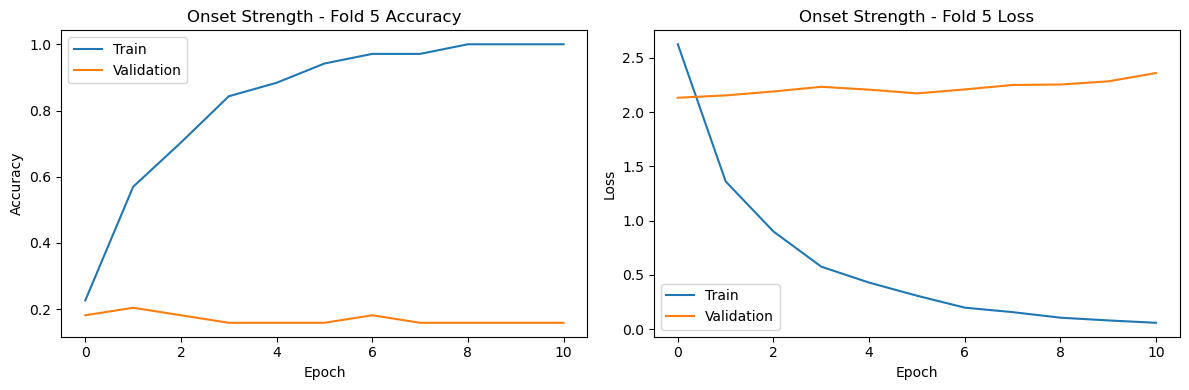

In [11]:
# Plot training/validation accuracy and loss for each model and fold
for feature_type, results in individual_results.items():
    histories = results.get('histories', [])
    if not histories:
        continue
    print(f"\n{'='*40}\n{feature_type.replace('_', ' ').title()} Training History\n{'='*40}")
    for fold, history in enumerate(histories):
        plt.figure(figsize=(12, 4))
        # Accuracy
        plt.subplot(1, 2, 1)
        plt.plot(history.get("accuracy", []), label="Train")
        plt.plot(history.get("val_accuracy", []), label="Validation")
        plt.title(f"{feature_type.replace('_', ' ').title()} - Fold {fold+1} Accuracy")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.legend()
        # Loss
        plt.subplot(1, 2, 2)
        plt.plot(history.get("loss", []), label="Train")
        plt.plot(history.get("val_loss", []), label="Validation")
        plt.title(f"{feature_type.replace('_', ' ').title()} - Fold {fold+1} Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.tight_layout()
        plt.show()

In [12]:
# Get best individual model by mean accuracy
best_model = performance_df.iloc[0]['Feature Type'].replace(' ', '_').lower()
ensemble_acc = np.array(ensemble_results['accuracy_list'])
individual_acc = np.array(individual_results[best_model]['accuracy_list'])

t_stat, p_val = ttest_rel(ensemble_acc, individual_acc)
print(f"Paired t-test p-value (ensemble vs best individual): {p_val:.4e}")
if p_val < 0.05:
    print("Difference is statistically significant (p < 0.05)")
else:
    print("Difference is NOT statistically significant (p >= 0.05)")

Paired t-test p-value (ensemble vs best individual): 2.0856e-01
Difference is NOT statistically significant (p >= 0.05)


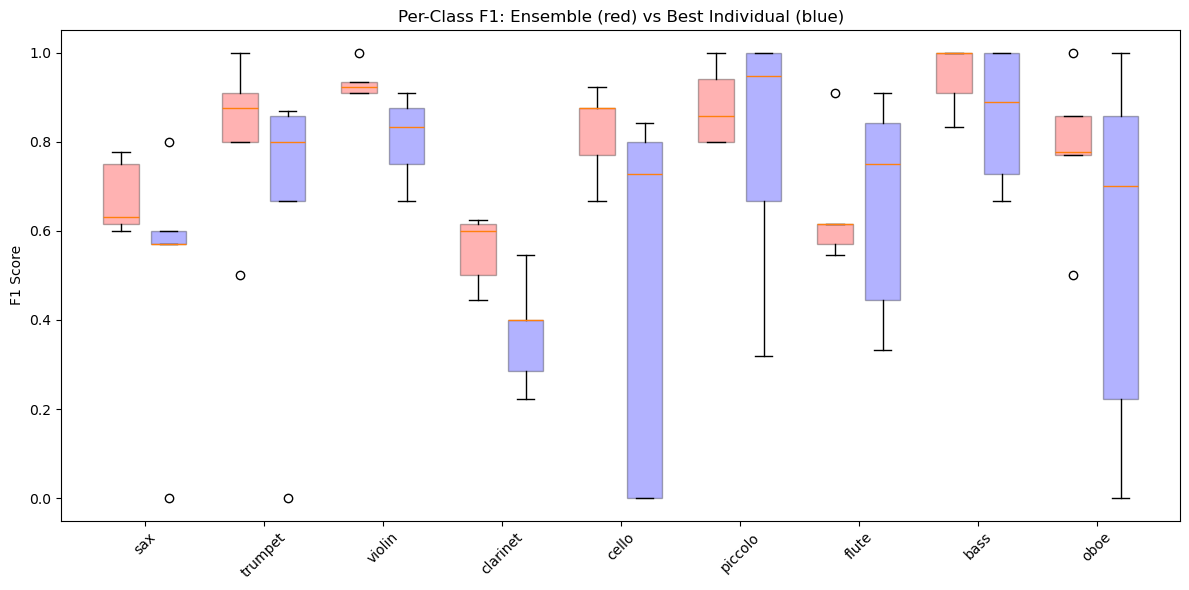

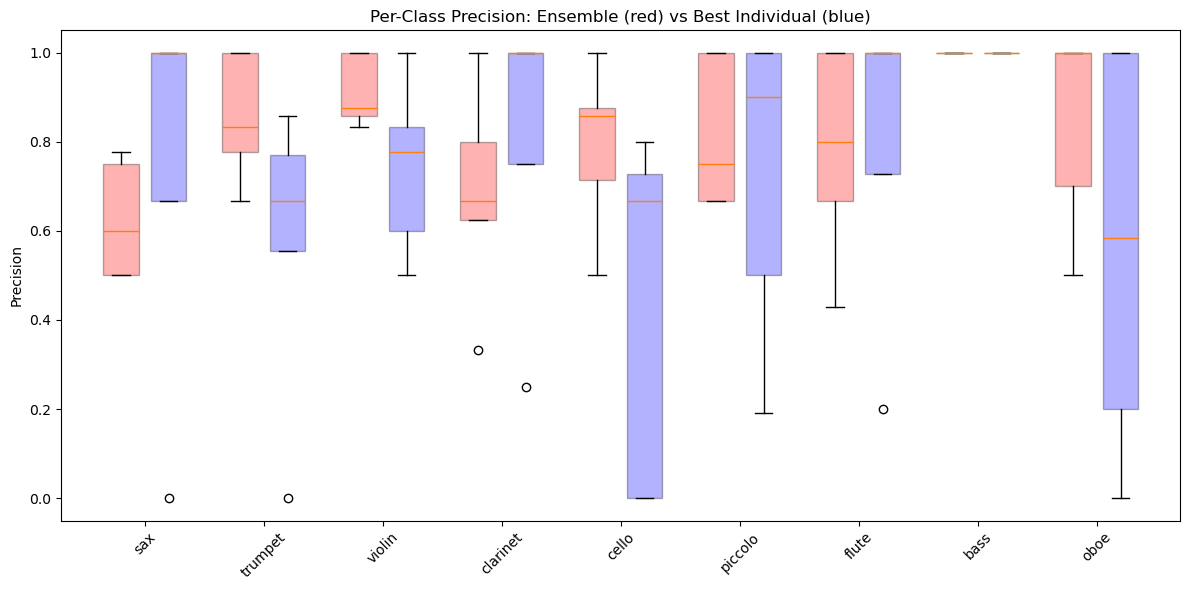

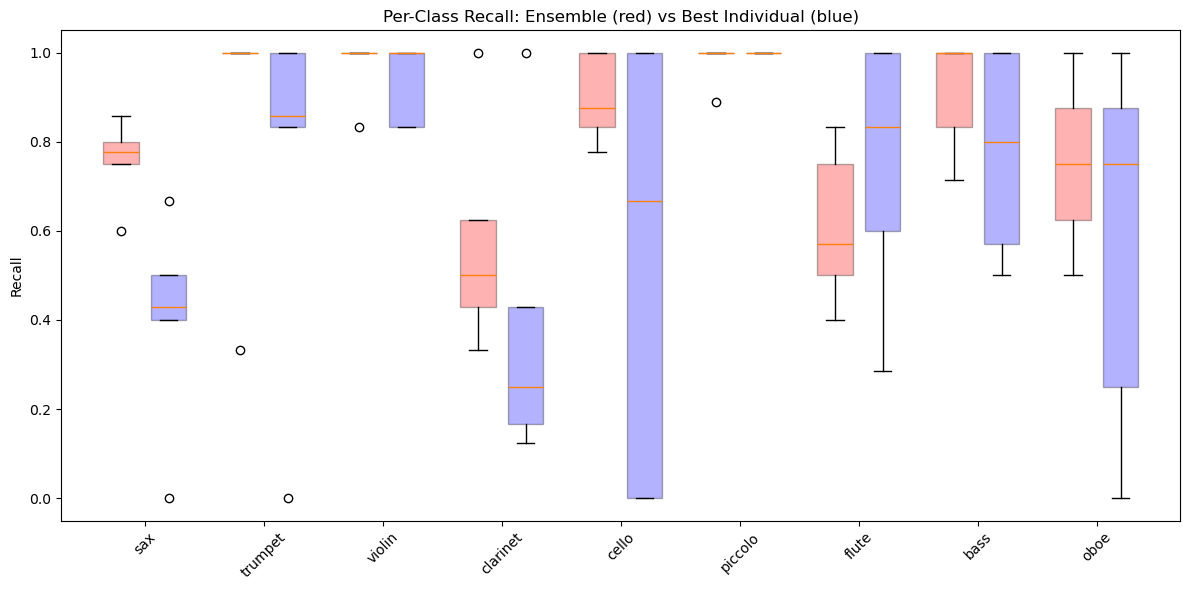

In [13]:
# Compare per-class F1, Precision, Recall between ensemble and best individual model
best_model = performance_df.iloc[0]['Feature Type'].replace(' ', '_').lower()
ensemble_f1, individual_f1 = [], []
ensemble_prec, individual_prec = [], []
ensemble_rec, individual_rec = [], []

class_labels = [str(i) for i in range(len(class_names))]

for fold in range(len(ensemble_results['classification_reports'])):
    e_report = ensemble_results['classification_reports'][fold]
    i_report = individual_results[best_model]['classification_reports'][fold]
    ensemble_f1.append([e_report[c]['f1-score'] for c in class_labels])
    individual_f1.append([i_report[c]['f1-score'] for c in class_labels])
    ensemble_prec.append([e_report[c]['precision'] for c in class_labels])
    individual_prec.append([i_report[c]['precision'] for c in class_labels])
    ensemble_rec.append([e_report[c]['recall'] for c in class_labels])
    individual_rec.append([i_report[c]['recall'] for c in class_labels])

ensemble_f1 = np.array(ensemble_f1)
individual_f1 = np.array(individual_f1)
ensemble_prec = np.array(ensemble_prec)
individual_prec = np.array(individual_prec)
ensemble_rec = np.array(ensemble_rec)
individual_rec = np.array(individual_rec)

plt.figure(figsize=(12, 6))
plt.boxplot([ensemble_f1[:,i] for i in range(len(class_names))], positions=np.arange(len(class_names))-0.2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='red', alpha=0.3), labels=class_names)
plt.boxplot([individual_f1[:,i] for i in range(len(class_names))], positions=np.arange(len(class_names))+0.2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.3))
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.ylabel('F1 Score')
plt.title('Per-Class F1: Ensemble (red) vs Best Individual (blue)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.boxplot([ensemble_prec[:,i] for i in range(len(class_names))], positions=np.arange(len(class_names))-0.2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='red', alpha=0.3), labels=class_names)
plt.boxplot([individual_prec[:,i] for i in range(len(class_names))], positions=np.arange(len(class_names))+0.2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.3))
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.ylabel('Precision')
plt.title('Per-Class Precision: Ensemble (red) vs Best Individual (blue)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.boxplot([ensemble_rec[:,i] for i in range(len(class_names))], positions=np.arange(len(class_names))-0.2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='red', alpha=0.3), labels=class_names)
plt.boxplot([individual_rec[:,i] for i in range(len(class_names))], positions=np.arange(len(class_names))+0.2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.3))
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.ylabel('Recall')
plt.title('Per-Class Recall: Ensemble (red) vs Best Individual (blue)')
plt.tight_layout()
plt.show()

In [14]:
# Show top-3 most confused class pairs for ensemble and best individual (by sum of off-diagonal confusion)
def top_confusions(conf_matrices, class_names, top_n=3):
    total_conf = np.sum(np.array(conf_matrices), axis=0)
    np.fill_diagonal(total_conf, 0)
    flat = total_conf.flatten()
    top_idx = flat.argsort()[-top_n:][::-1]
    for idx in top_idx:
        i, j = divmod(idx, total_conf.shape[1])
        print(f"True: {class_names[i]}, Pred: {class_names[j]}, Count: {total_conf[i, j]}")

print("Top 3 most confused class pairs (Ensemble):")
top_confusions(ensemble_results['confusion_matrices'], class_names)

best_model = performance_df.iloc[0]['Feature Type'].replace(' ', '_').lower()
print("\nTop 3 most confused class pairs (Best Individual):")
top_confusions(individual_results[best_model]['confusion_matrices'], class_names)

Top 3 most confused class pairs (Ensemble):
True: flute, Pred: sax, Count: 6
True: clarinet, Pred: sax, Count: 5
True: flute, Pred: clarinet, Count: 4

Top 3 most confused class pairs (Best Individual):
True: oboe, Pred: piccolo, Count: 10
True: clarinet, Pred: piccolo, Count: 6
True: clarinet, Pred: flute, Count: 5


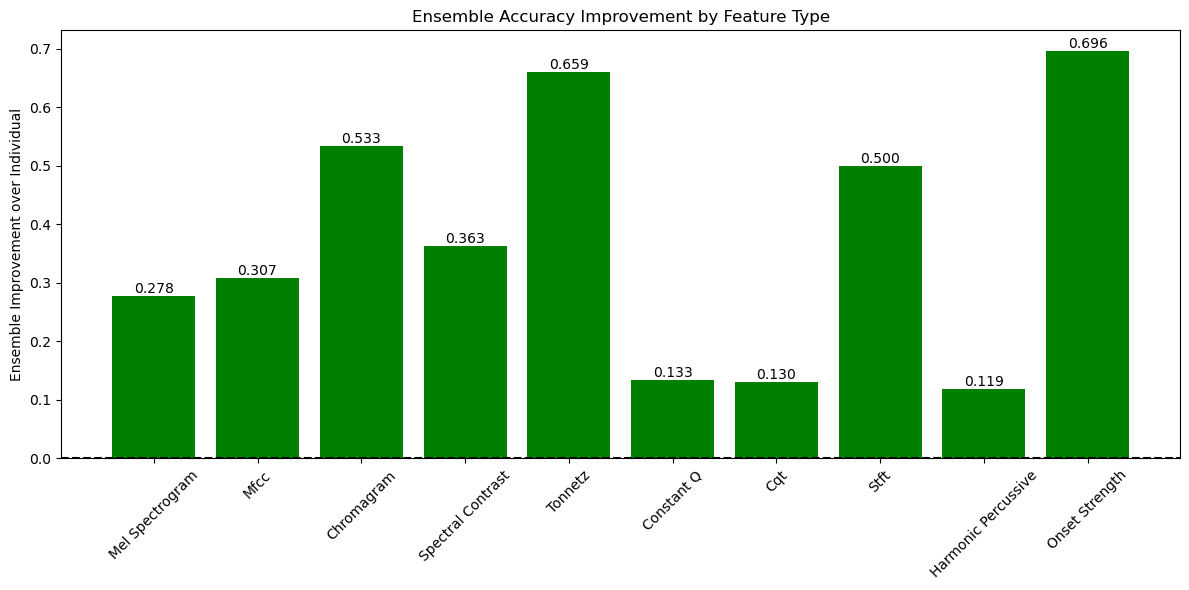

In [15]:
# Bar plot of (ensemble accuracy - individual accuracy) per feature type
improvements = []
for ft in FEATURE_TYPES:
    if ft in individual_results:
        individual_mean = np.mean(individual_results[ft]['accuracy_list'])
        improvement = np.mean(ensemble_results['accuracy_list']) - individual_mean
        improvements.append(improvement)
    else:
        improvements.append(np.nan)

plt.figure(figsize=(12, 6))
bars = plt.bar([ft.replace('_', ' ').title() for ft in FEATURE_TYPES], improvements, color=['green' if imp > 0 else 'red' for imp in improvements])
plt.axhline(0, color='black', linestyle='--')
plt.ylabel('Ensemble Improvement over Individual')
plt.title('Ensemble Accuracy Improvement by Feature Type')
plt.xticks(rotation=45)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{improvements[i]:.3f}", ha='center', va='bottom' if improvements[i] > 0 else 'top')
plt.tight_layout()
plt.show()

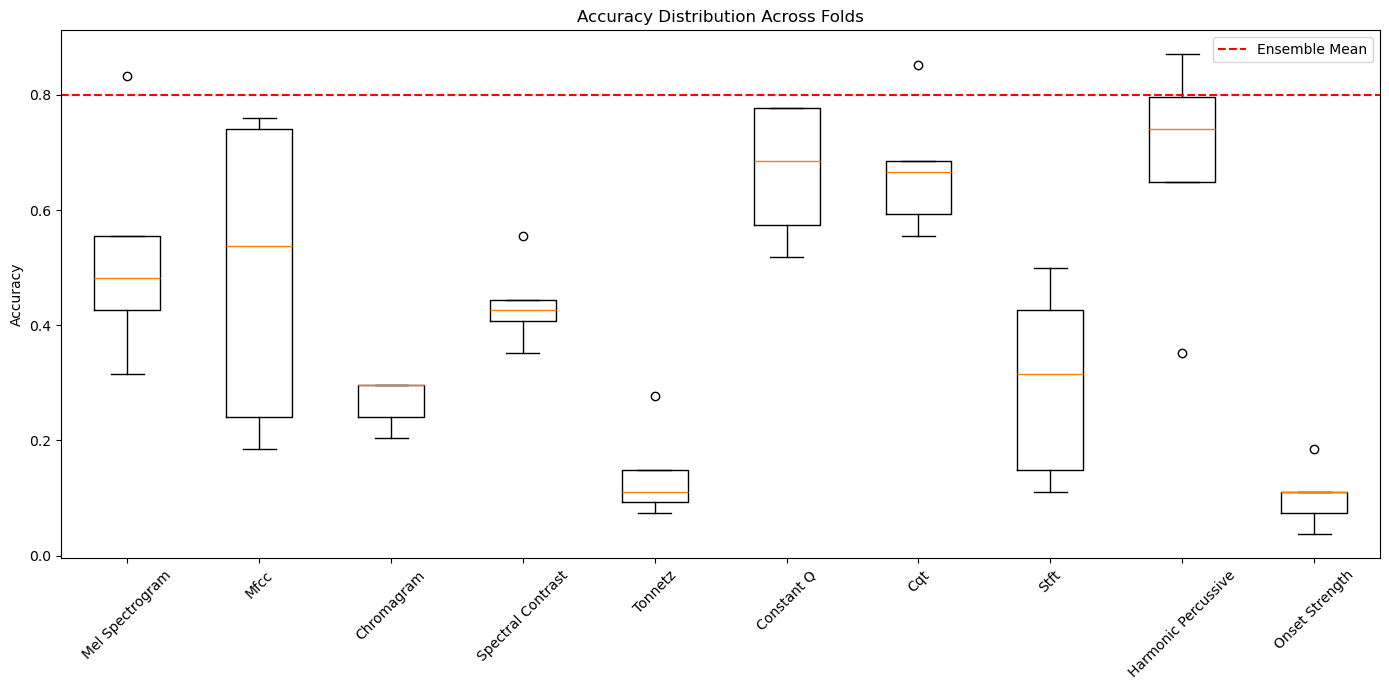

In [16]:
# Boxplot of accuracy distributions across folds for each model and the ensemble
data_for_box = [individual_results[ft]['accuracy_list'] for ft in FEATURE_TYPES if ft in individual_results]
labels = [ft.replace('_', ' ').title() for ft in FEATURE_TYPES if ft in individual_results]

plt.figure(figsize=(14, 7))
plt.boxplot(data_for_box, labels=labels)
plt.axhline(np.mean(ensemble_results['accuracy_list']), color='red', linestyle='--', label='Ensemble Mean')
plt.ylabel('Accuracy')
plt.title('Accuracy Distribution Across Folds')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# Show the worst and best performing fold for each model and the ensemble
print("Worst and Best Fold Accuracies:")
for ft in FEATURE_TYPES:
    if ft in individual_results:
        accs = individual_results[ft]['accuracy_list']
        print(f"{ft.replace('_', ' ').title()}: Min={np.min(accs):.4f}, Max={np.max(accs):.4f}")
ensemble_accs = ensemble_results['accuracy_list']
print(f"Ensemble: Min={np.min(ensemble_accs):.4f}, Max={np.max(ensemble_accs):.4f}")

Worst and Best Fold Accuracies:
Mel Spectrogram: Min=0.3148, Max=0.8333
Mfcc: Min=0.1852, Max=0.7593
Chromagram: Min=0.2037, Max=0.2963
Spectral Contrast: Min=0.3519, Max=0.5556
Tonnetz: Min=0.0741, Max=0.2778
Constant Q: Min=0.5185, Max=0.7778
Cqt: Min=0.5556, Max=0.8519
Stft: Min=0.1111, Max=0.5000
Harmonic Percussive: Min=0.3519, Max=0.8704
Onset Strength: Min=0.0370, Max=0.1852
Ensemble: Min=0.7407, Max=0.8704
